In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
lista_terapie = []

for nome_file in os.listdir('Terapie'):
    percorso_file = os.path.join('Terapie', nome_file)
    df = pd.read_pickle(percorso_file)
    df = df.reset_index(drop=True)
    lista_terapie.append(df)

Stadio tumore
0 =  0.28%
1 = 33.86%
2 = 57.02%
3 =  8.20%
4 =  0.64%

In [3]:
display(lista_terapie[0])

age_at_diagnosis  overall_survival_months death_from_cancer  tumor_size  \
0               56.79                    44.83   Died of Disease        16.0   
1               76.06                   198.30            Living        20.0   
2               60.96                    14.17   Died of Disease        18.0   
3               61.78                   163.73            Living        15.0   
4               55.53                   190.17            Living        15.0   
..                ...                      ...               ...         ...   
215             70.91                   163.53            Living        21.0   
216             61.81                   224.23            Living        15.0   
217             61.16                   256.87   Died of Disease        15.0   
218             50.21                   123.90            Living        18.0   
219             63.10                   108.43            Living        18.0   

    COR_Terapie         Terapie        Operation_Stage  
0     (0, 1, 1)  radio + ormone  BREAST CONSERVING 1.0  
1     (0, 0, 1)           radio  BREAST CONSERVING 1.0  
2     (0, 0, 1)           radio  BREAST CONSERVING 1.0  
3     (0, 0, 1)           radio  BREAST CONSERVING 1.0  
4     (0, 0, 1)           radio  BREAST CONSERVING 1.0  
..          ...             ...                    ...  
215   (0, 1, 1)  radio + ormone  BREAST CONSERVING 1.0  
216   (0, 0, 1)           radio  BREAST CONSERVING 1.0  
217   (0, 1, 1)  radio + ormone  BREAST CONSERVING 1.0  
218   (0, 0, 1)           radio  BREAST CONSERVING 1.0  
219   (0, 1, 1)  radio + ormone  BREAST CONSERVING 1.0  

[220 rows x 7 columns]

In [4]:
df_nuovo = lista_terapie[7].copy()
lista_terapie.pop(7)
display(df_nuovo)

age_at_diagnosis  overall_survival_months death_from_cancer  tumor_size  \
0                56.79                    44.83   Died of Disease        16.0   
1                76.06                   198.30            Living        20.0   
2                60.96                    14.17   Died of Disease        18.0   
3                61.78                   163.73            Living        15.0   
4                55.53                   190.17            Living        15.0   
...                ...                      ...               ...         ...   
1060             57.79                     9.07   Died of Disease        48.0   
1061             78.77                     7.80   Died of Disease        31.0   
1062             73.24                    89.90   Died of Disease        67.0   
1063             67.46                    48.53   Died of Disease        25.0   
1064             85.49                   132.03   Died of Disease        22.0   

     COR_Terapie          Terapie        Operation_Stage  
0      (0, 1, 1)   radio + ormone  BREAST CONSERVING 1.0  
1      (0, 0, 1)            radio  BREAST CONSERVING 1.0  
2      (0, 0, 1)            radio  BREAST CONSERVING 1.0  
3      (0, 0, 1)            radio  BREAST CONSERVING 1.0  
4      (0, 0, 1)            radio  BREAST CONSERVING 1.0  
...          ...              ...                    ...  
1060   (1, 1, 1)            tutte         MASTECTOMY 4.0  
1061   (0, 1, 1)   radio + ormone         MASTECTOMY 4.0  
1062   (0, 0, 0)          nessuna         MASTECTOMY 4.0  
1063   (1, 1, 0)  chemio + ormone         MASTECTOMY 4.0  
1064   (0, 1, 1)   radio + ormone         MASTECTOMY 4.0  

[1065 rows x 7 columns]

In [5]:
df_statistiche = lista_terapie[7].copy()
lista_terapie.pop(7)
display(df_statistiche)

Cura   Media  Minimo  Massimo  Mediana
0   radio + ormone  148.45    2.00   318.20   144.44
1            radio  202.80   34.10   307.93   200.88
2            tutte  130.00   13.40   259.93   130.99
3           chemio  175.49   25.03   278.27   180.06
4          nessuna  190.01    1.23   337.03   205.73
5           ormone  159.26    1.27   300.87   163.40
6   chemio + radio  173.68   10.83   322.83   186.90
7  chemio + ormone  133.72   72.67   194.20   140.55

In [6]:
lista_grafici = []
def crea_grafico(tasso_sopravvivenza, titolo, n, m):
    terapia = tasso_sopravvivenza['Terapia']
    vivi = tasso_sopravvivenza['Percentuale(v/m)'].apply(lambda y: y[0])
    morti = tasso_sopravvivenza['Percentuale(v/m)'].apply(lambda y: y[1])
    
    plt.figure(figsize=(20, 12))
    
    x_pos = np.arange(len(terapia))
    
    plt.bar(x_pos - 0.1, vivi, width=0.1, color='green', label='Percentuale pazienti vivi')
    plt.bar(x_pos + 0.1, morti, width=0.1, color='red', label='Percentuale pazienti morti')
    
    for i in range(len(terapia)):
        plt.text(x_pos[i] - 0.1, vivi[i], f'{vivi[i]}%\ncount: {n[i]}', ha='center', va='bottom', color='green', fontweight='bold')
        plt.text(x_pos[i] + 0.1, morti[i] + 1, f'{morti[i]}%\ncount: {m[i]}', ha='center', va='bottom', color='red', fontweight='bold')
    
    plt.xticks(x_pos, terapia)
    plt.legend()
    plt.title(titolo)

In [7]:
tasso_mortalità = []
n = []
m = []

for titolo, dataset in zip(os.listdir('Terapie'), lista_terapie):
    y = titolo[2:-4]
    value_counts = (dataset['death_from_cancer'].value_counts())
    conto_n = value_counts.get('Living', 0)
    conto_m = value_counts.get('Died of Disease', 0)
    totale = value_counts.sum()
    percentuale = ((value_counts / totale) * 100).round(2)
    print(f'Per {y}, questa è la percentuale di pazienti vivi e morti:', percentuale)
    
    percentuale_vivi = percentuale.get('Living', 0)
    percentuale_morti = percentuale.get('Died of Disease', 0)
    
    tupla = (percentuale_vivi, percentuale_morti)
    tasso_mortalità.append((y, tupla))
    n.append(conto_n)
    m.append(conto_m)
    
tasso_sopravvivenza = pd.DataFrame(tasso_mortalità, columns=['Terapia', 'Percentuale(v/m)'])

Per BREAST CONSERVING 1.0, questa è la percentuale di pazienti vivi e morti: death_from_cancer
Living             72.73
Died of Disease    27.27
Name: count, dtype: float64
Per BREAST CONSERVING 2.0, questa è la percentuale di pazienti vivi e morti: death_from_cancer
Living             63.09
Died of Disease    36.91
Name: count, dtype: float64
Per BREAST CONSERVING 3.0, questa è la percentuale di pazienti vivi e morti: death_from_cancer
Died of Disease    55.0
Living             45.0
Name: count, dtype: float64
Per MASTECTOMY 1.0, questa è la percentuale di pazienti vivi e morti: death_from_cancer
Living             67.12
Died of Disease    32.88
Name: count, dtype: float64
Per MASTECTOMY 2.0, questa è la percentuale di pazienti vivi e morti: death_from_cancer
Died of Disease    54.25
Living             45.75
Name: count, dtype: float64
Per MASTECTOMY 3.0, questa è la percentuale di pazienti vivi e morti: death_from_cancer
Died of Disease    72.97
Living             27.03
Name: count, 

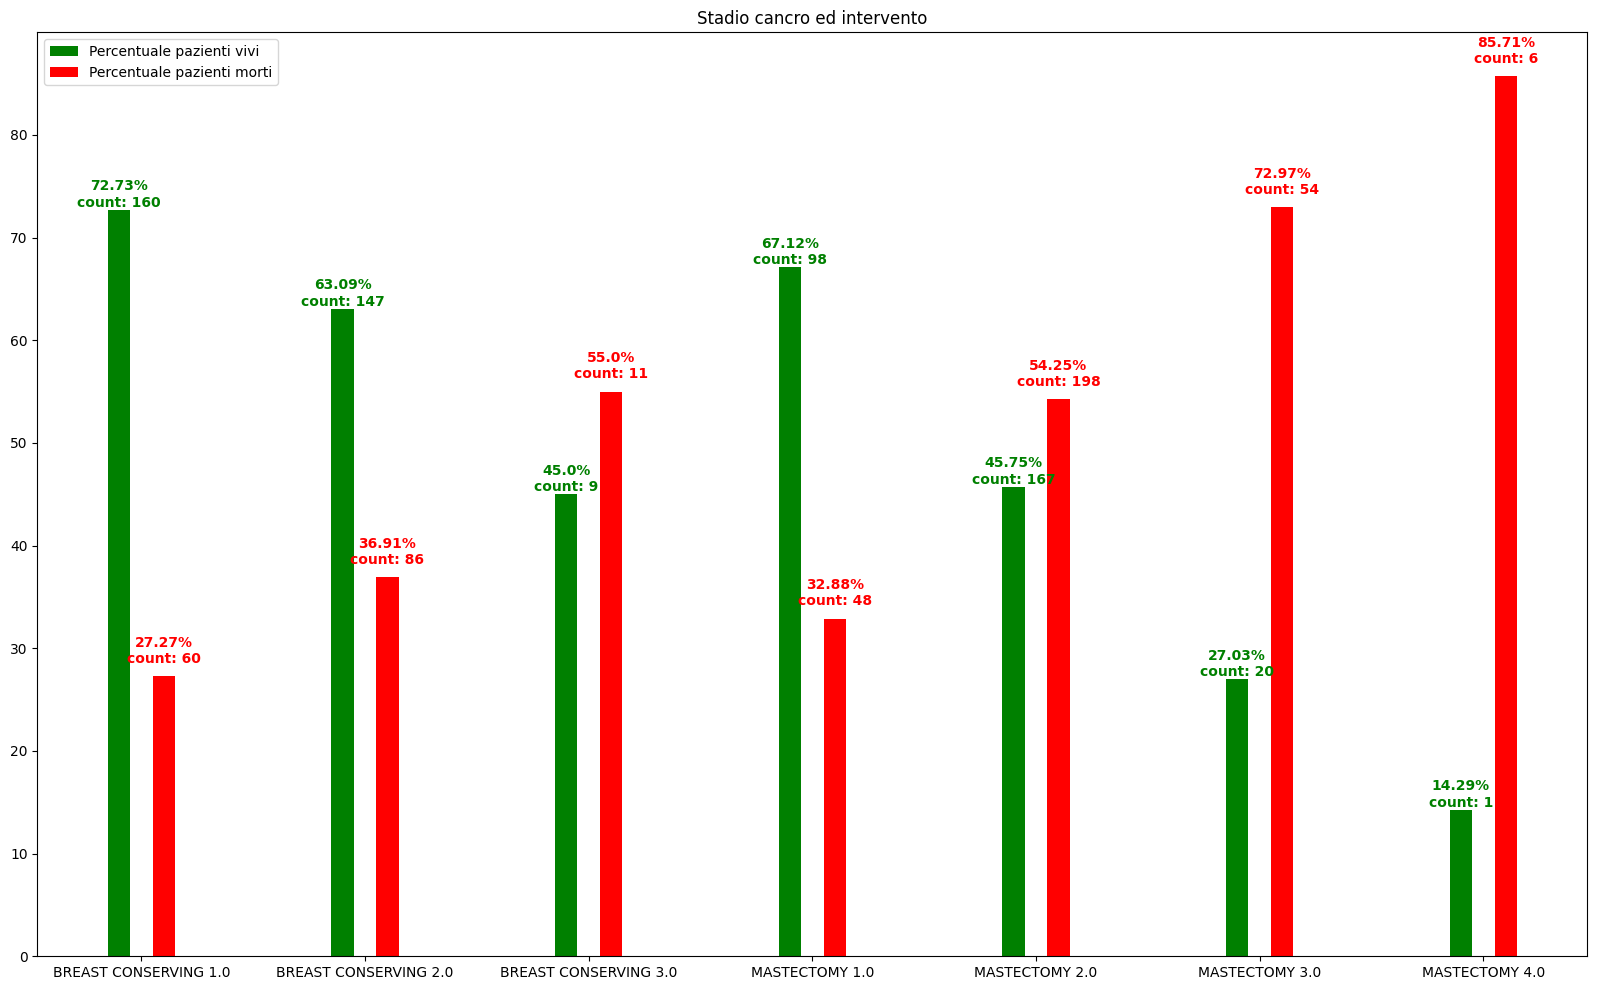

In [8]:
crea_grafico(tasso_sopravvivenza, "Stadio cancro ed intervento", n, m)

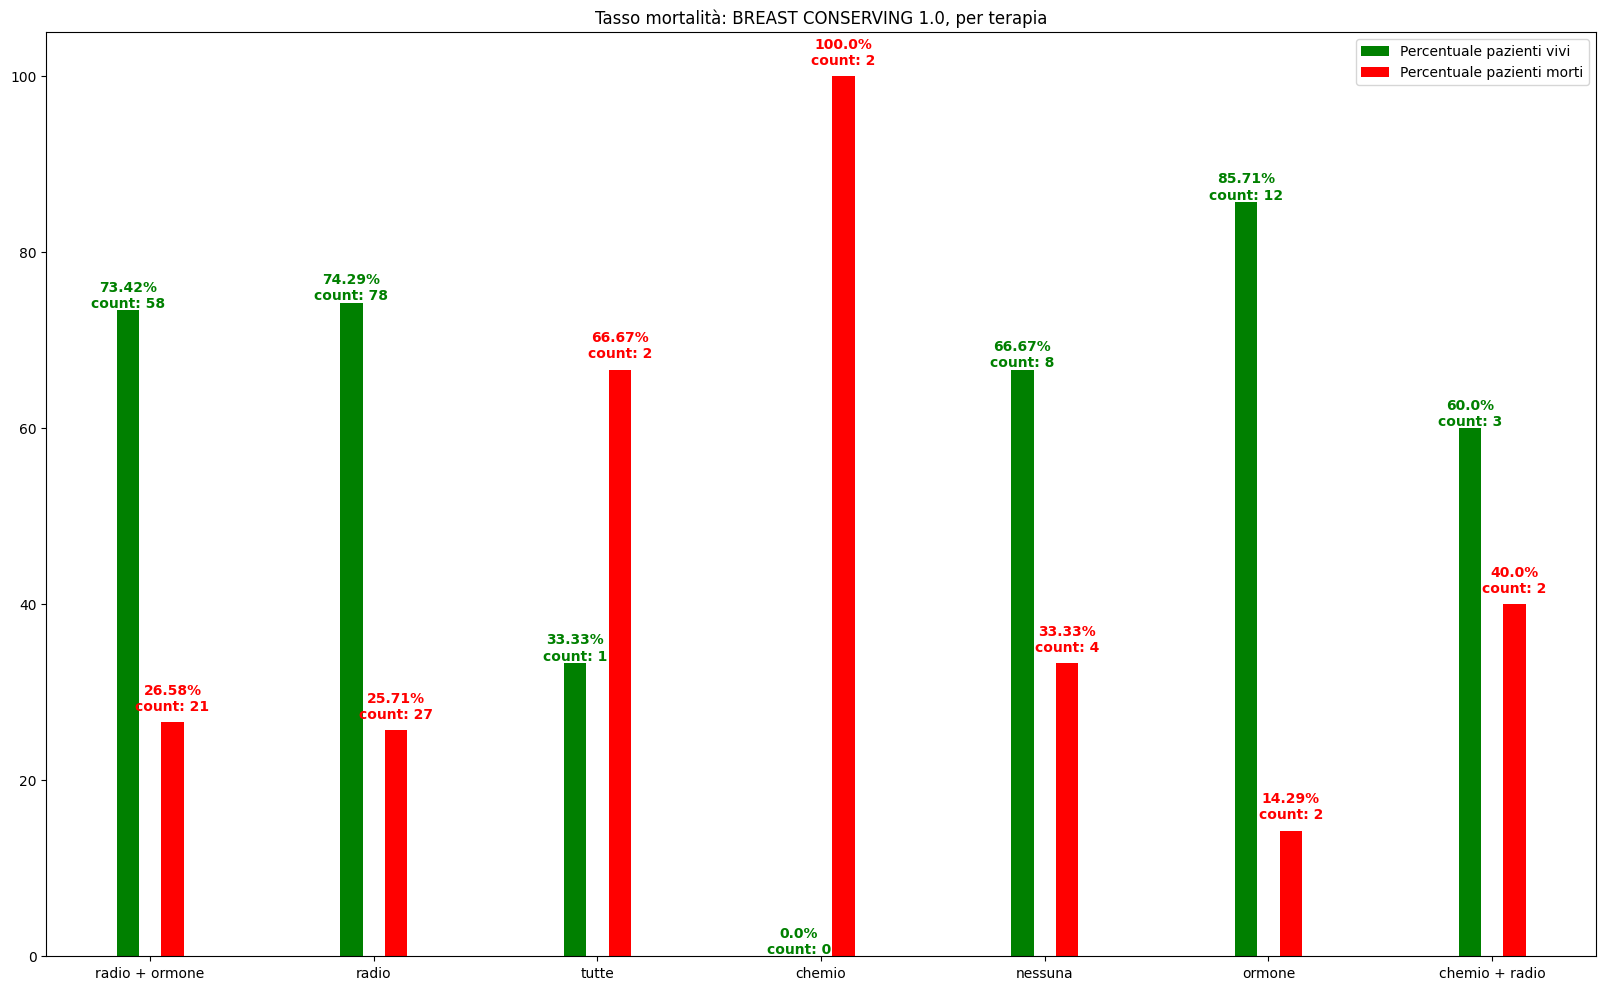

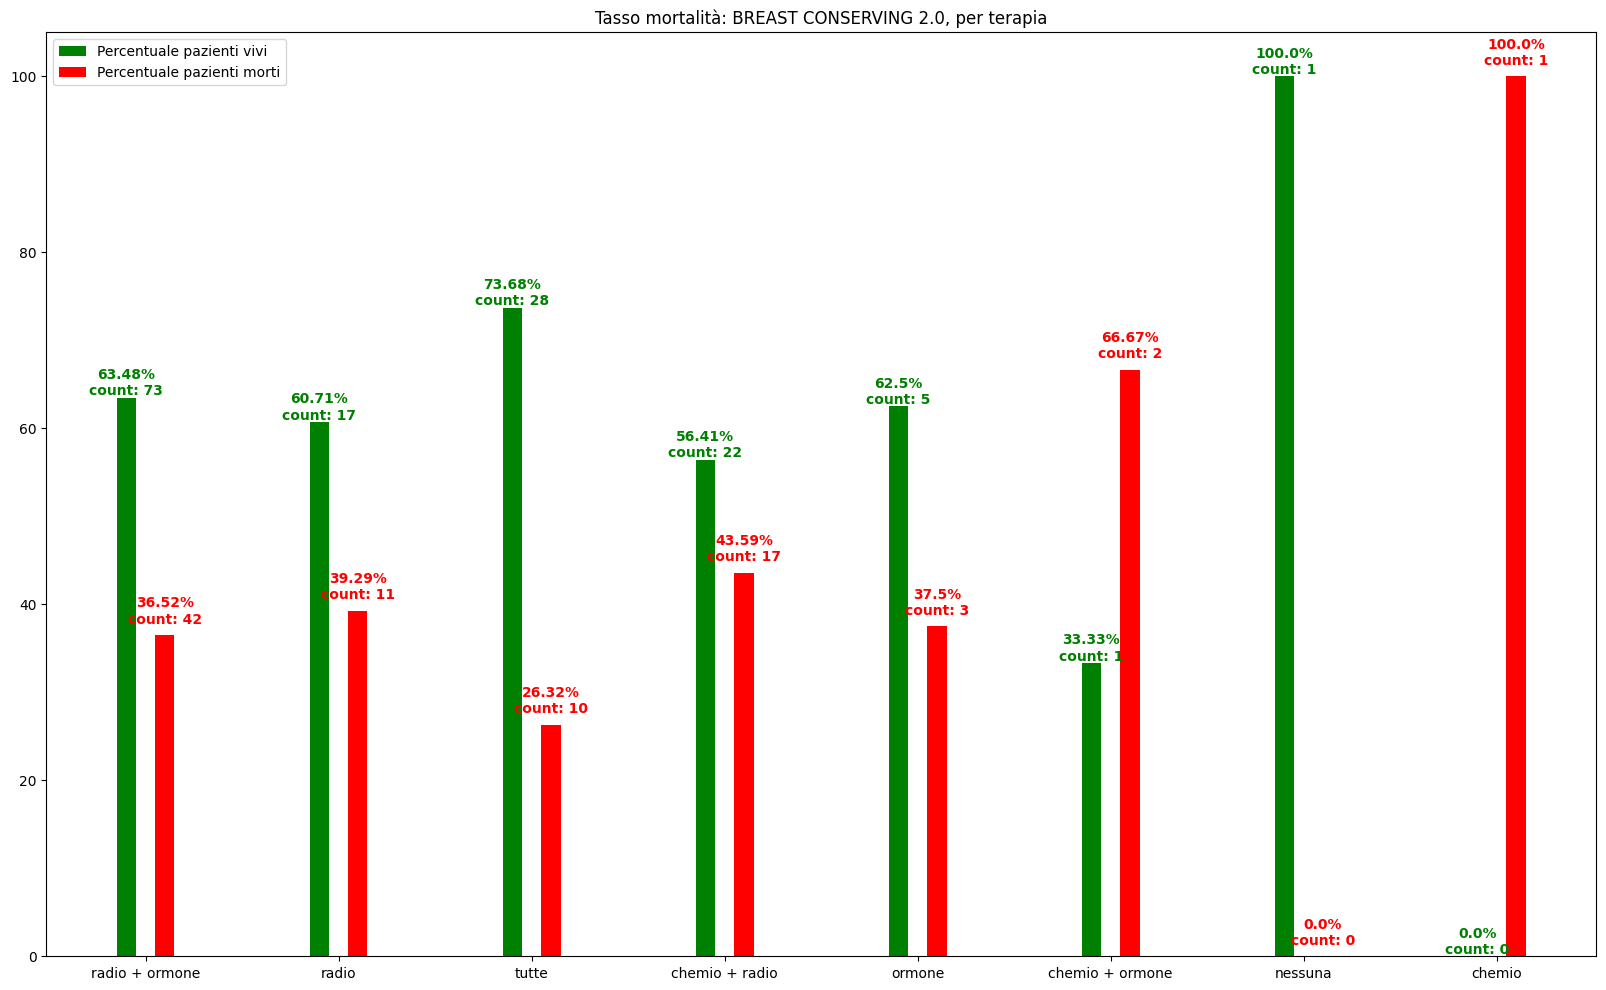

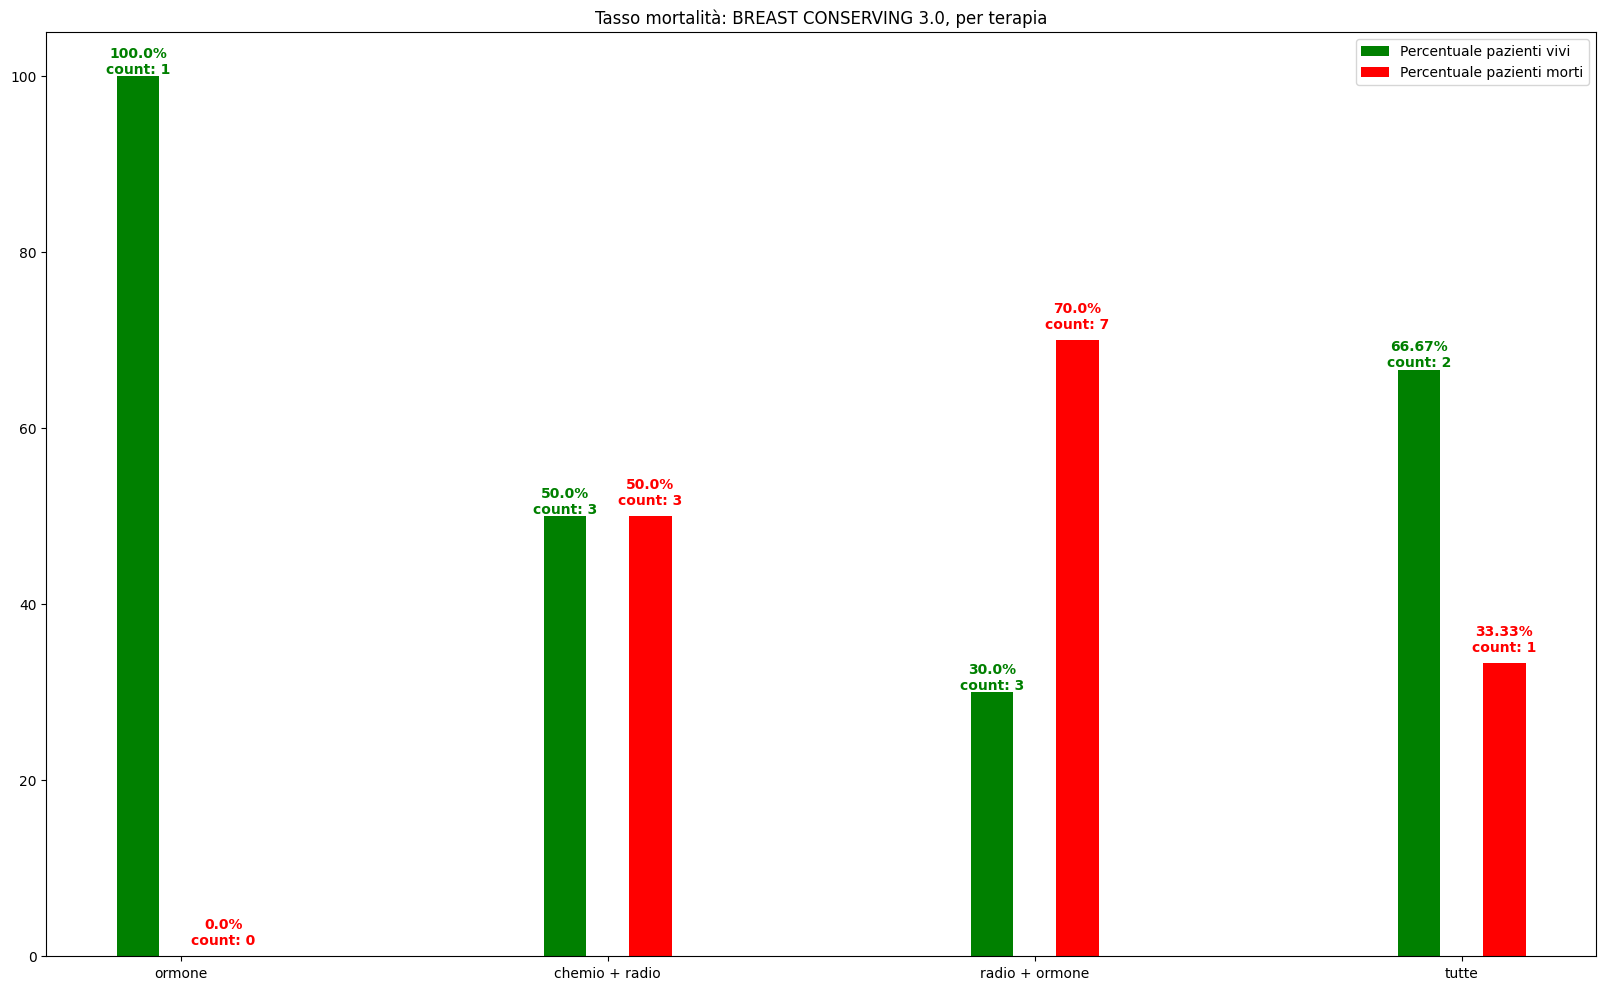

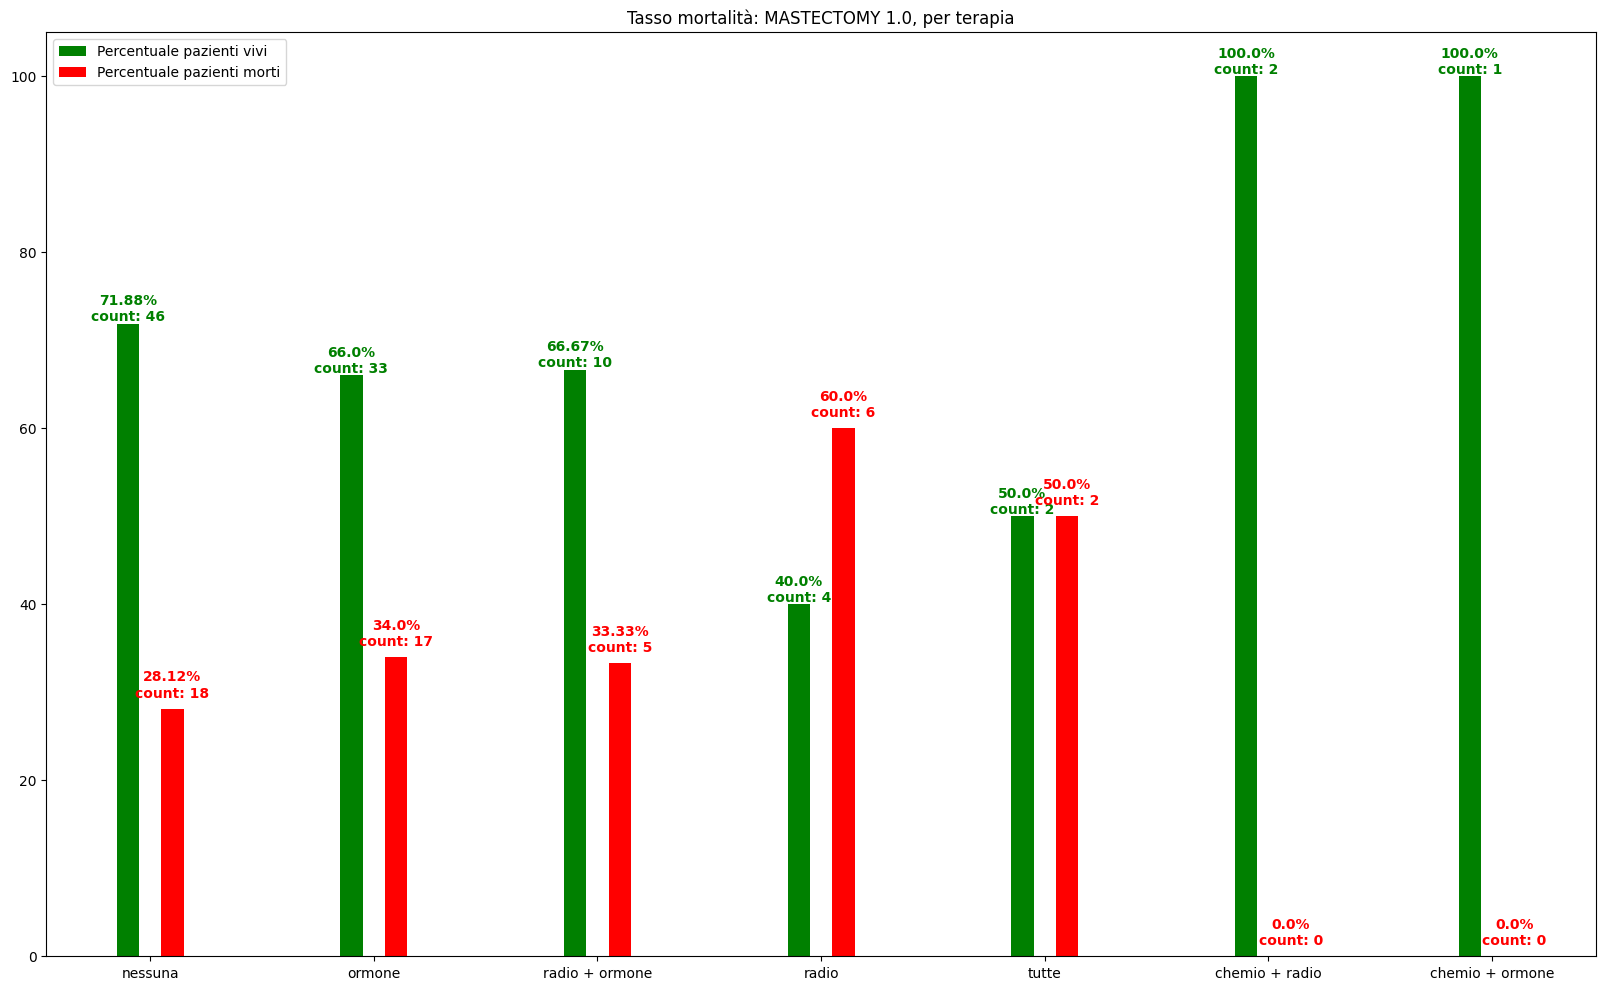

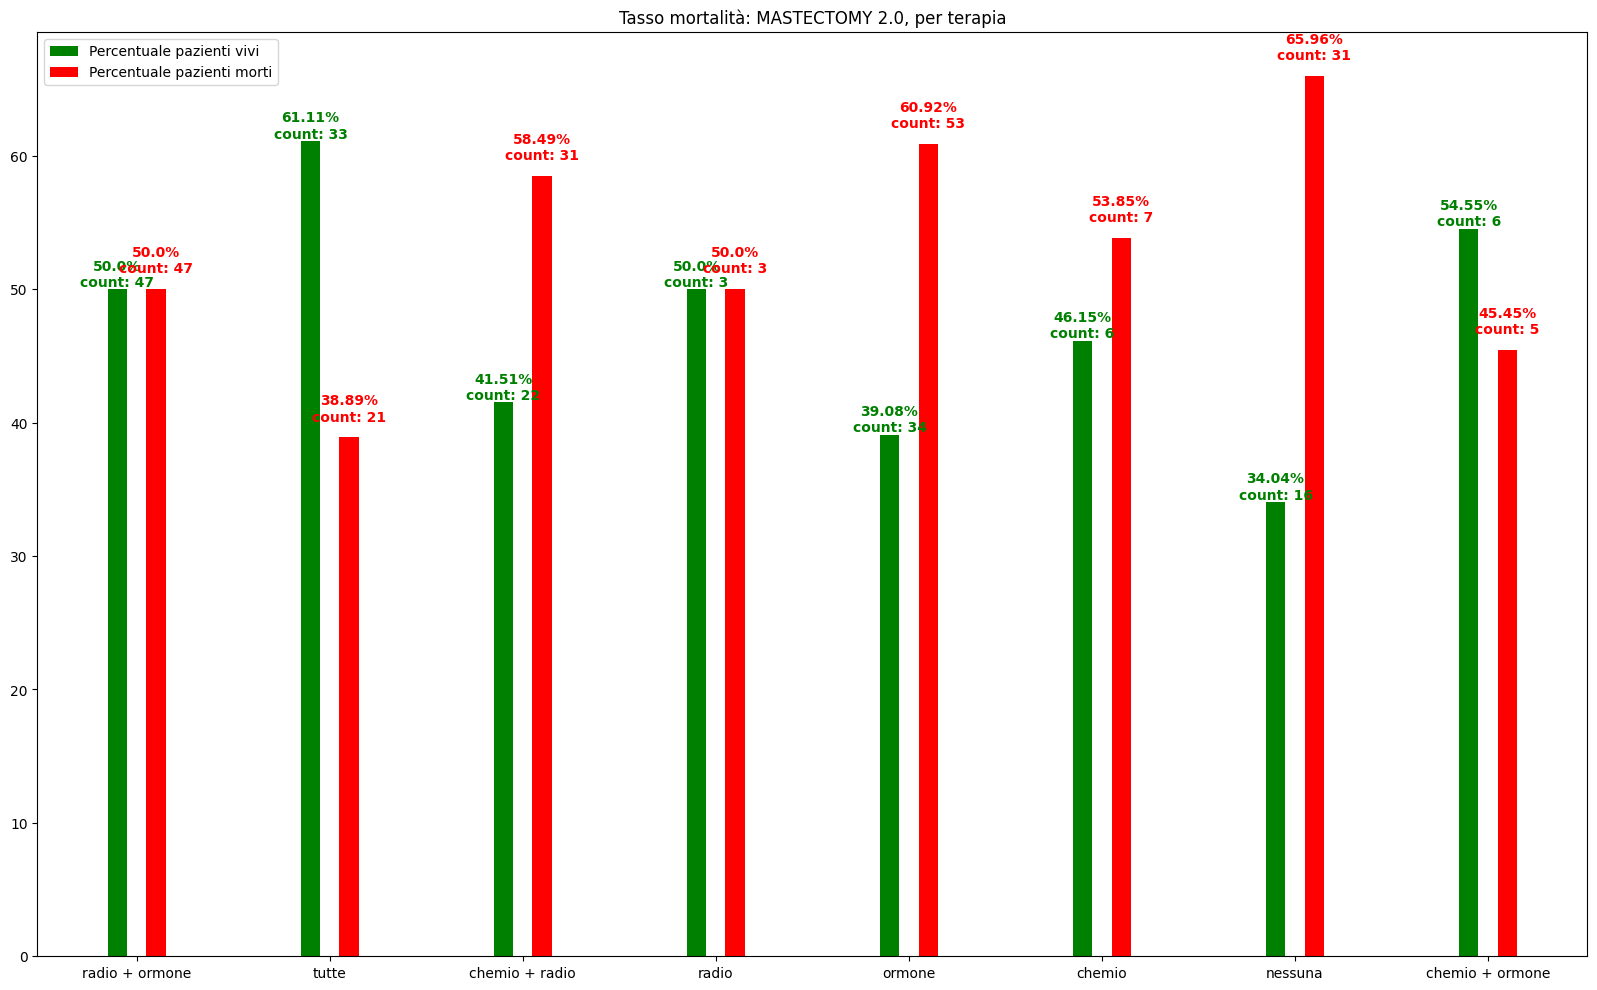

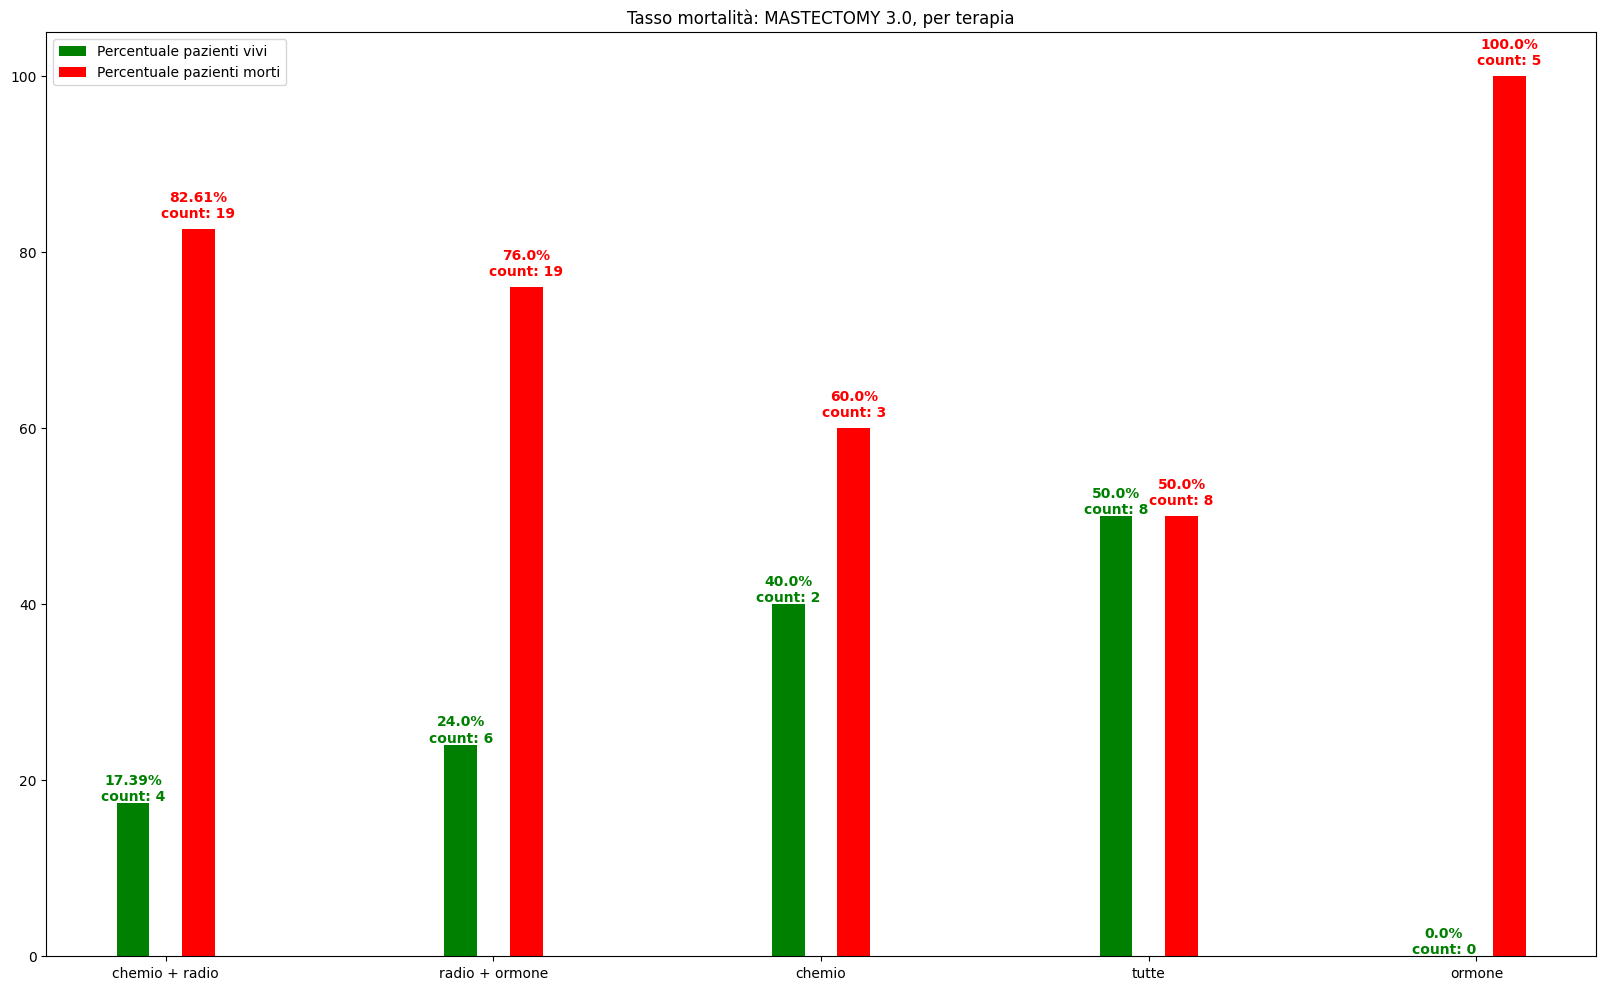

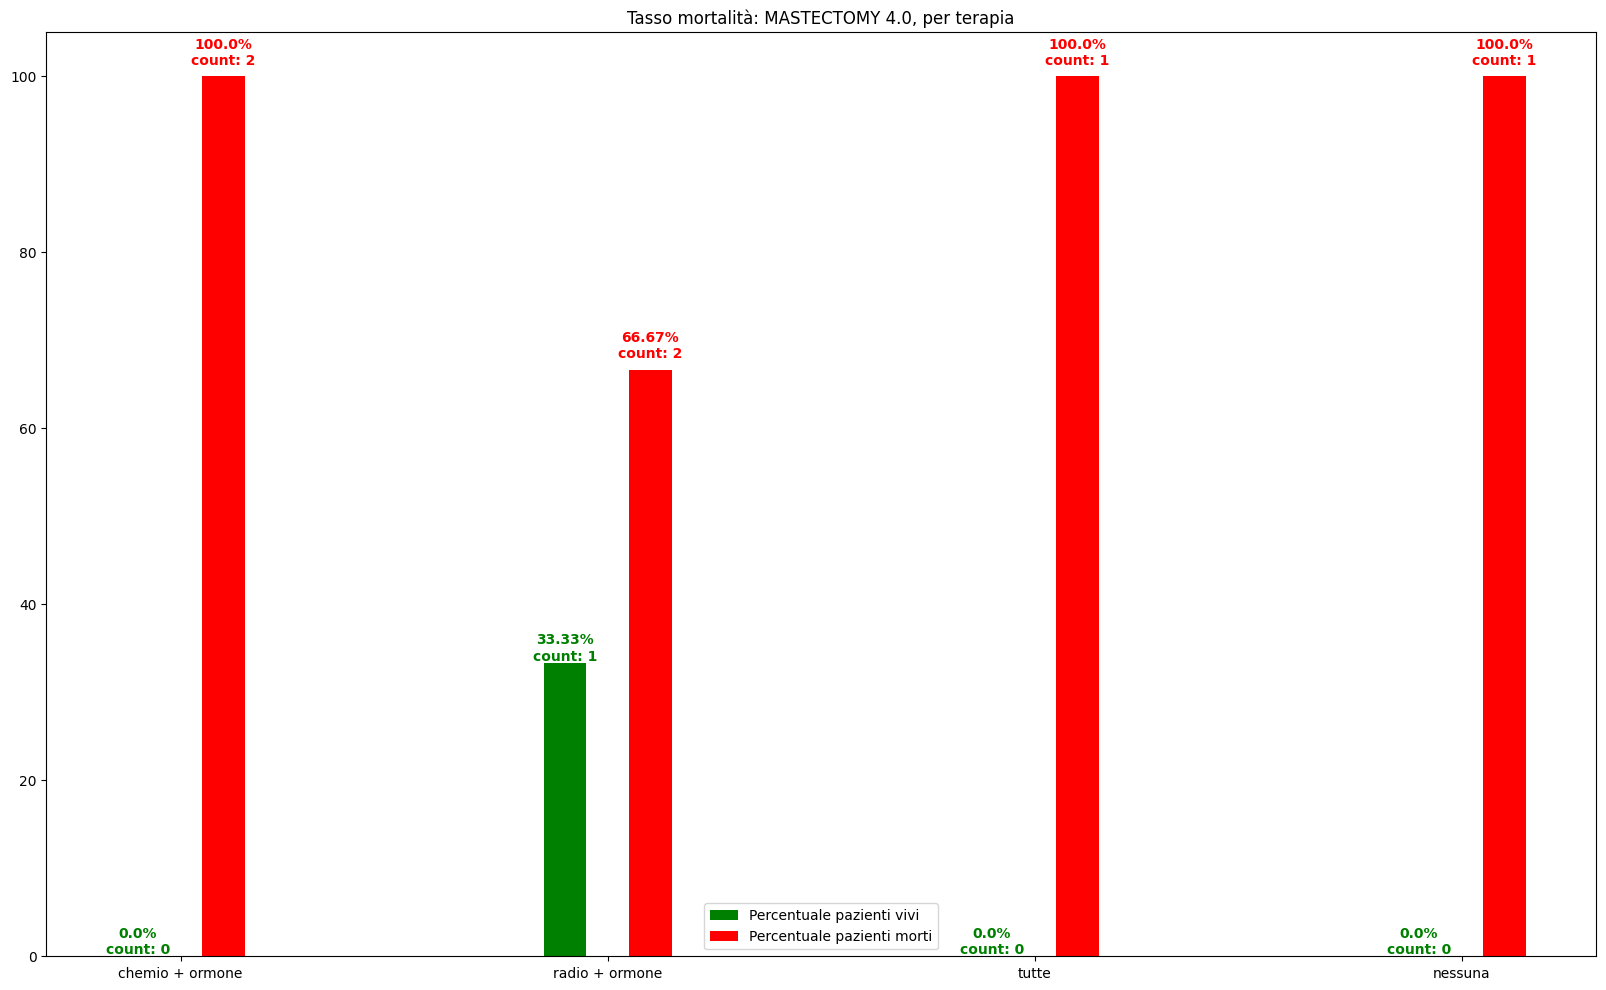

In [9]:
risultati = []

for dataset in lista_terapie:
    data = []
    n = []
    m = []

    for terapia in dataset['Terapie'].unique():
        df_terapia = dataset[dataset['Terapie'] == terapia]
        
        value_counts = df_terapia['death_from_cancer'].value_counts()

        conto_n = value_counts.get('Living', 0)
        conto_m = value_counts.get('Died of Disease', 0)
        
        totale = value_counts.sum()
        
        percentuale = ((value_counts / totale) * 100).round(2)
        percentuale_vivi = percentuale.get('Living', 0)
        percentuale_morti = percentuale.get('Died of Disease', 0)
        
        tupla = (percentuale_vivi, percentuale_morti)

        # Mi servirà dopo per calcolarmi con che probabilità si verifica un evento
        conteggio = (conto_n + conto_m)

        # Inserisco anche 'dataset['Operation_Stage'].iloc[0]' per facilitarmi dopo il multi index in quanto andrò a fare le percentuali assolute
        risultati.append((dataset['Operation_Stage'].iloc[0], terapia, tupla, conteggio))

        data.append({'Terapia': terapia, 'Percentuale(v/m)': tupla})
        n.append(conto_n)
        m.append(conto_m)
    
    grafico = pd.DataFrame(data)
    crea_grafico(grafico, f'Tasso mortalità: {dataset['Operation_Stage'].iloc[0]}, per terapia', n, m)

In [10]:
display(lista_terapie[0])

age_at_diagnosis  overall_survival_months death_from_cancer  tumor_size  \
0               56.79                    44.83   Died of Disease        16.0   
1               76.06                   198.30            Living        20.0   
2               60.96                    14.17   Died of Disease        18.0   
3               61.78                   163.73            Living        15.0   
4               55.53                   190.17            Living        15.0   
..                ...                      ...               ...         ...   
215             70.91                   163.53            Living        21.0   
216             61.81                   224.23            Living        15.0   
217             61.16                   256.87   Died of Disease        15.0   
218             50.21                   123.90            Living        18.0   
219             63.10                   108.43            Living        18.0   

    COR_Terapie         Terapie        Operation_Stage  
0     (0, 1, 1)  radio + ormone  BREAST CONSERVING 1.0  
1     (0, 0, 1)           radio  BREAST CONSERVING 1.0  
2     (0, 0, 1)           radio  BREAST CONSERVING 1.0  
3     (0, 0, 1)           radio  BREAST CONSERVING 1.0  
4     (0, 0, 1)           radio  BREAST CONSERVING 1.0  
..          ...             ...                    ...  
215   (0, 1, 1)  radio + ormone  BREAST CONSERVING 1.0  
216   (0, 0, 1)           radio  BREAST CONSERVING 1.0  
217   (0, 1, 1)  radio + ormone  BREAST CONSERVING 1.0  
218   (0, 0, 1)           radio  BREAST CONSERVING 1.0  
219   (0, 1, 1)  radio + ormone  BREAST CONSERVING 1.0  

[220 rows x 7 columns]

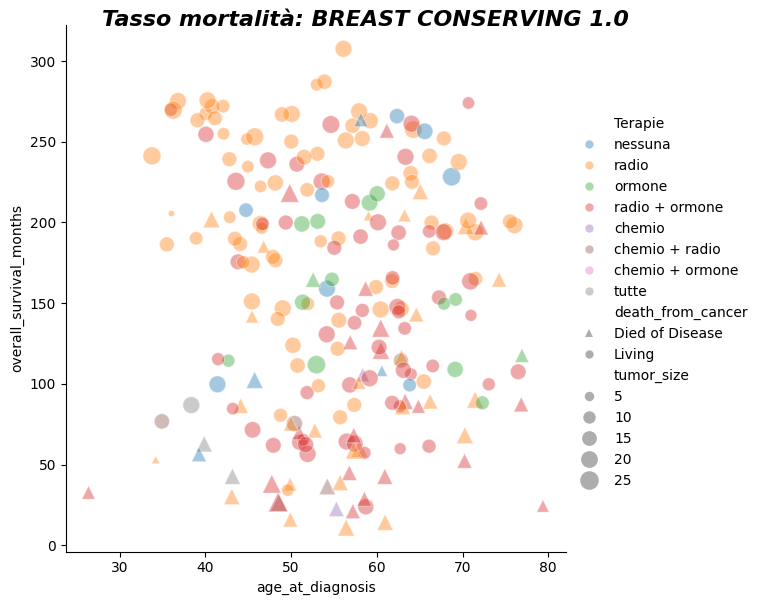

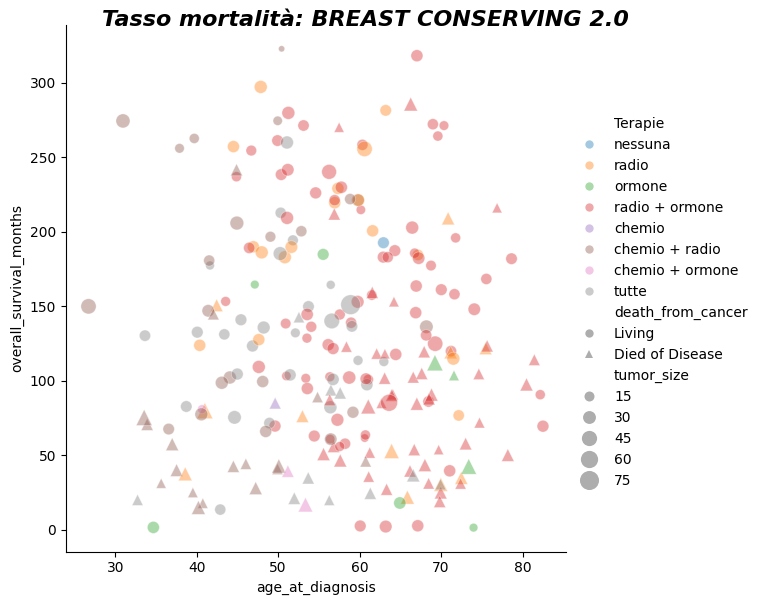

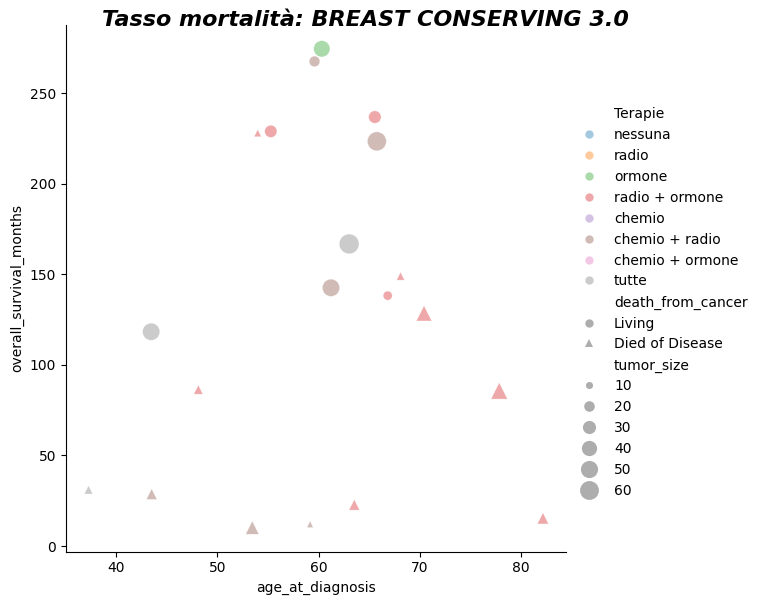

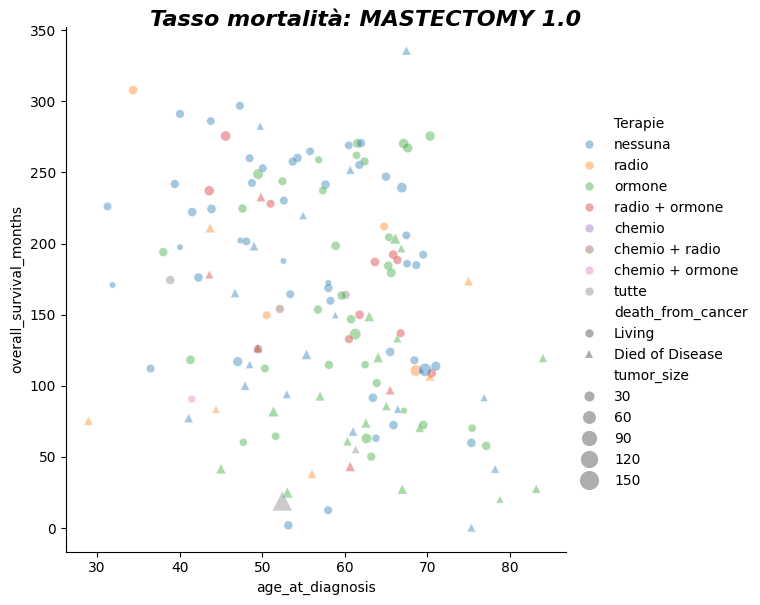

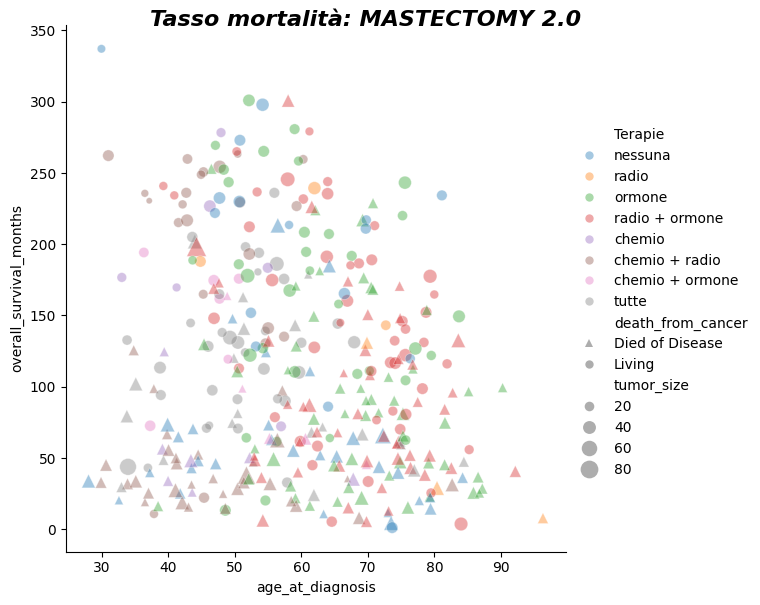

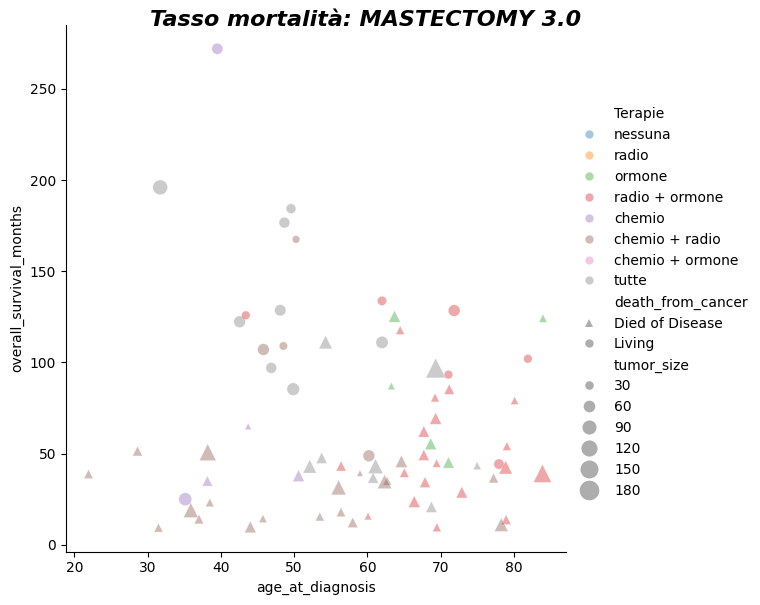

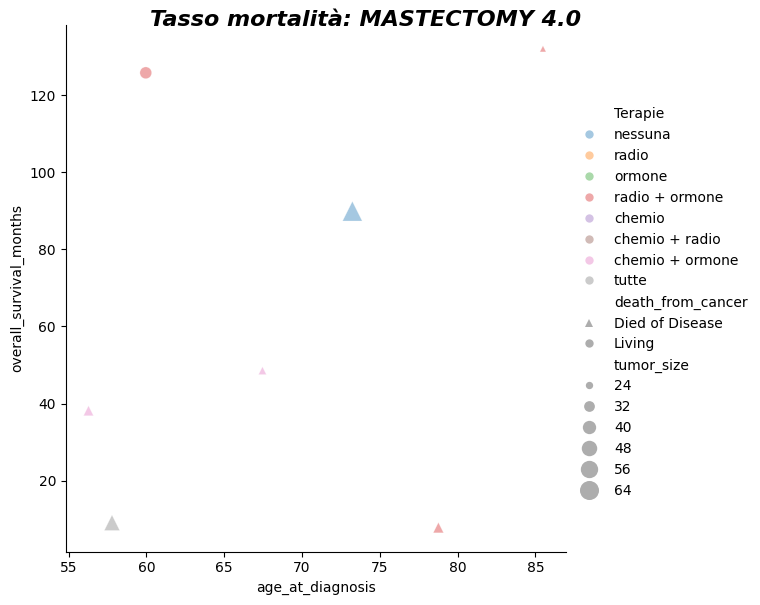

In [11]:
lista_ordinata = ['nessuna', 'radio', 'ormone', 'radio + ormone', 'chemio', 'chemio + radio', 'chemio + ormone', 'tutte']

for dataset in lista_terapie:
    g = sns.relplot(x="age_at_diagnosis", y="overall_survival_months", hue="Terapie", hue_order=lista_ordinata, size="tumor_size",
                    style='death_from_cancer', markers={'Died of Disease': '^', 'Living': 'o'}, sizes=(20, 200), alpha=0.4, 
                     height=6, data=dataset)
    g.fig.suptitle(f'Tasso mortalità: {dataset['Operation_Stage'].iloc[0]}', y=1, style='italic', fontsize=16, fontweight='bold')
    plt.subplots_adjust(wspace=1);

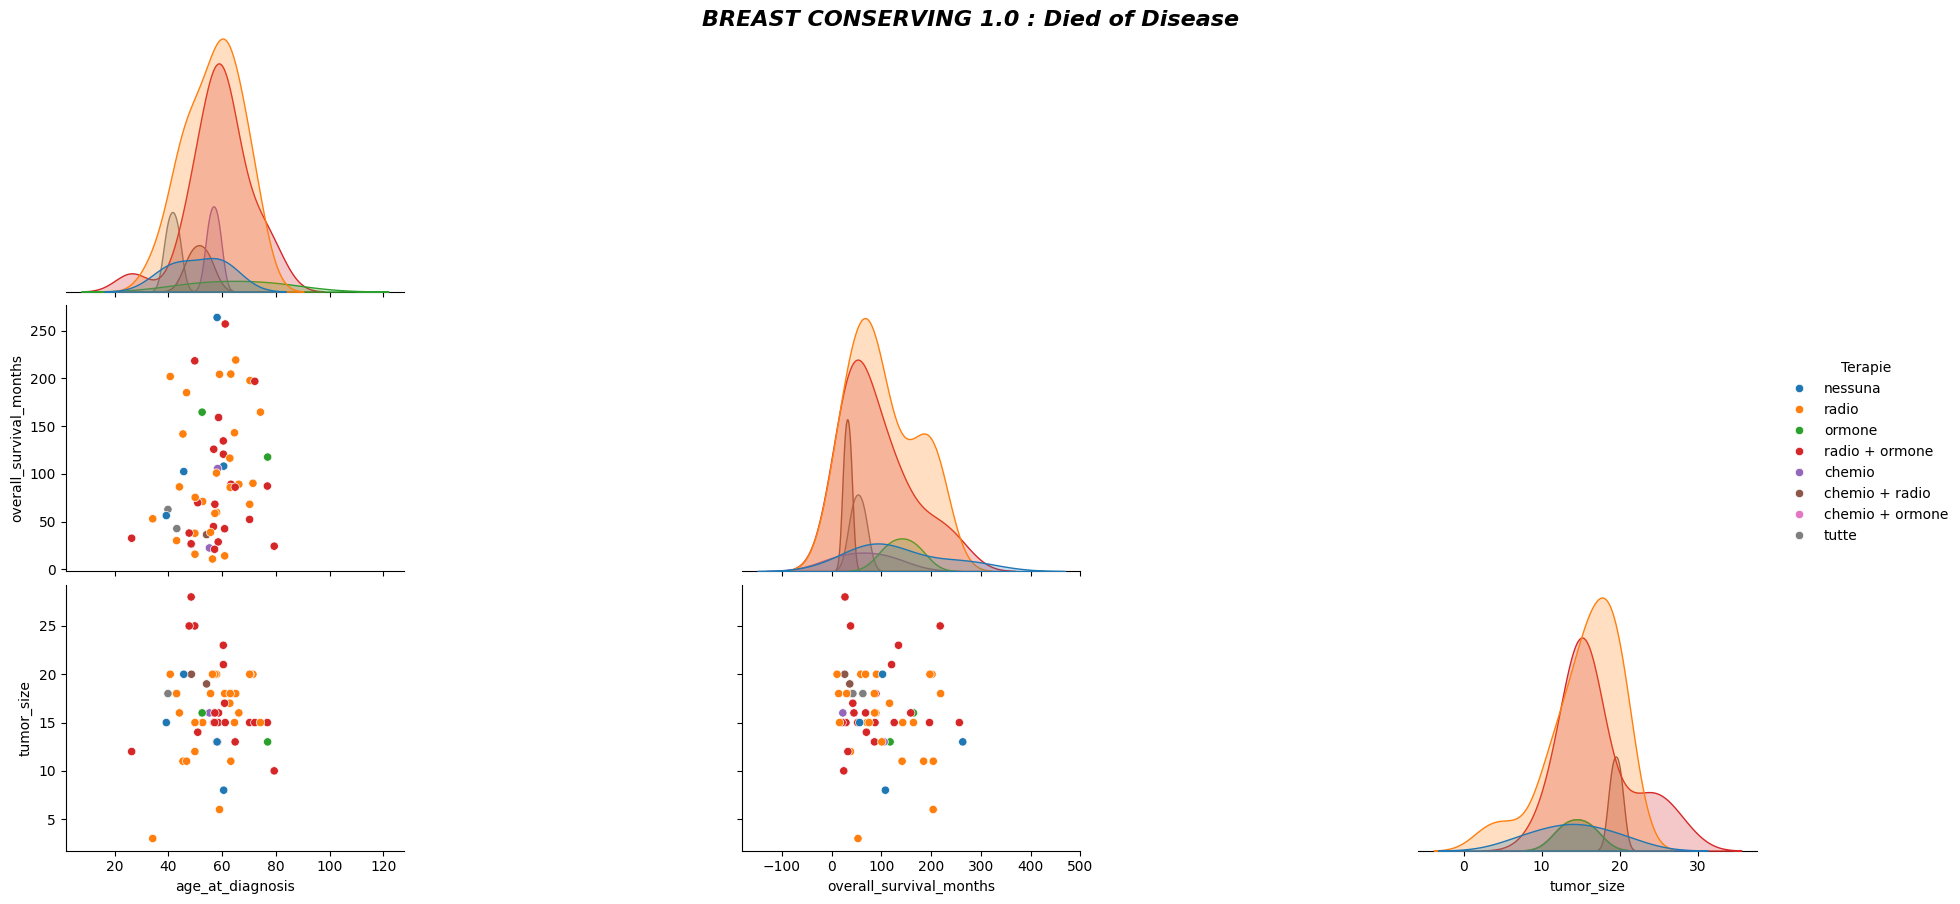

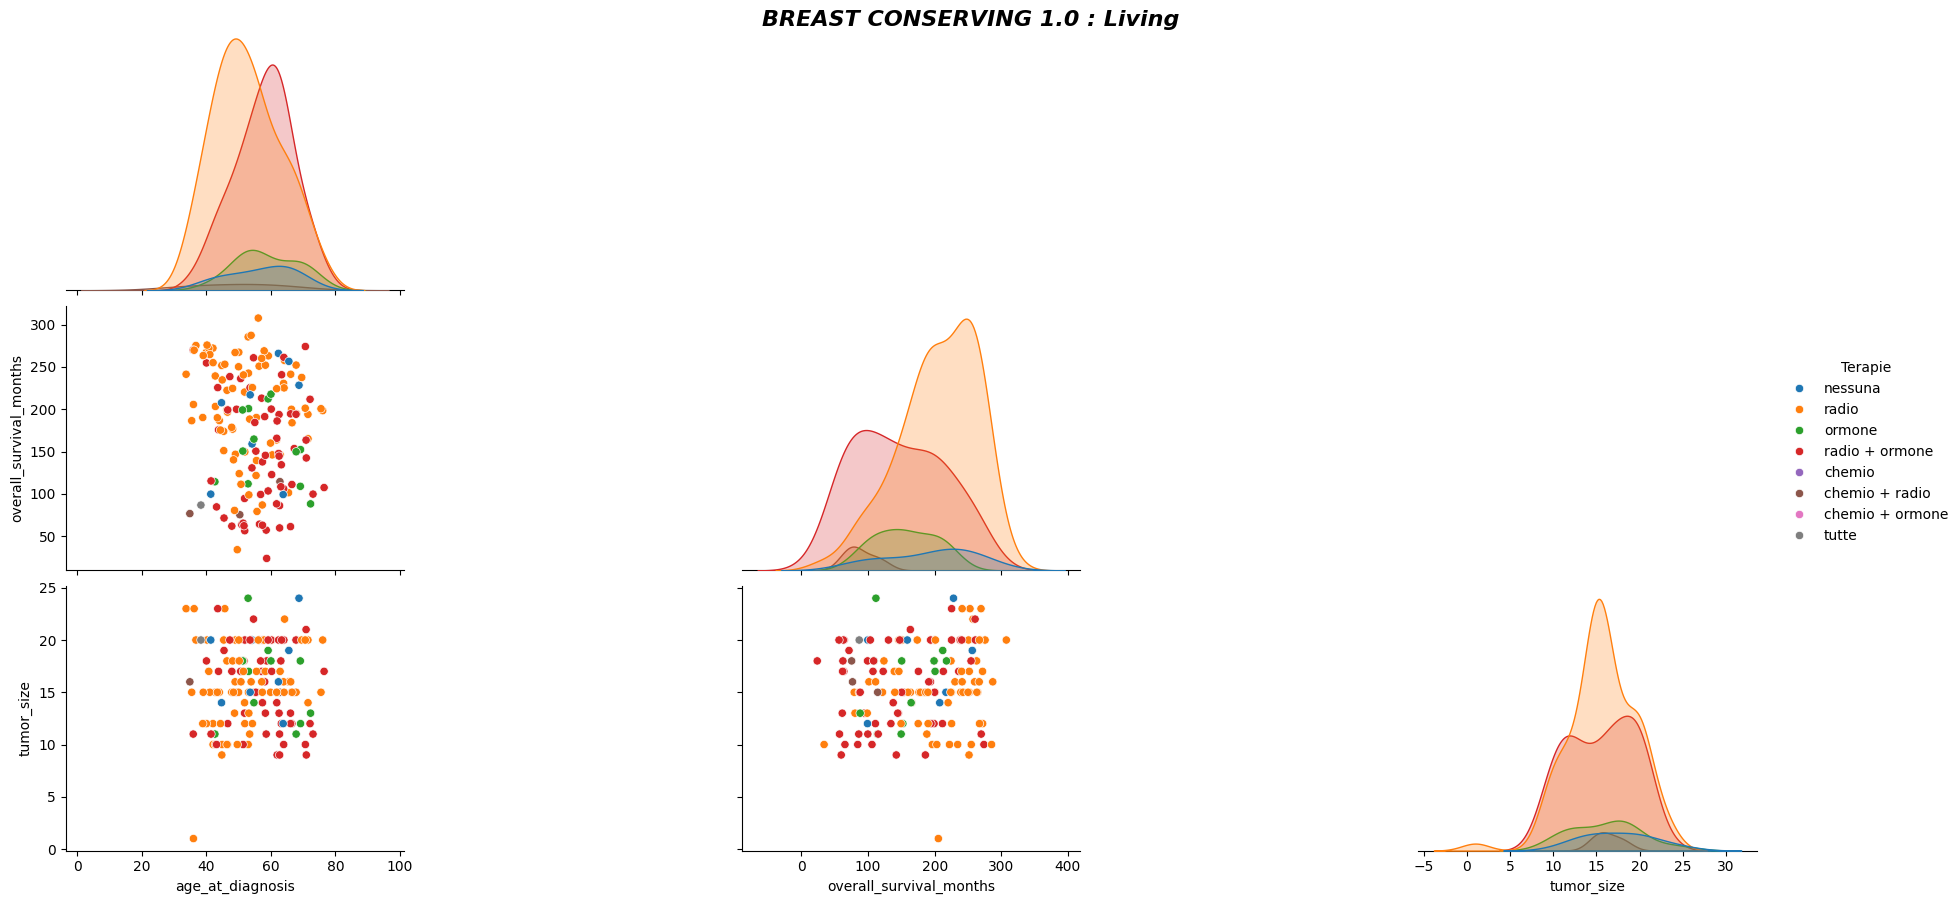

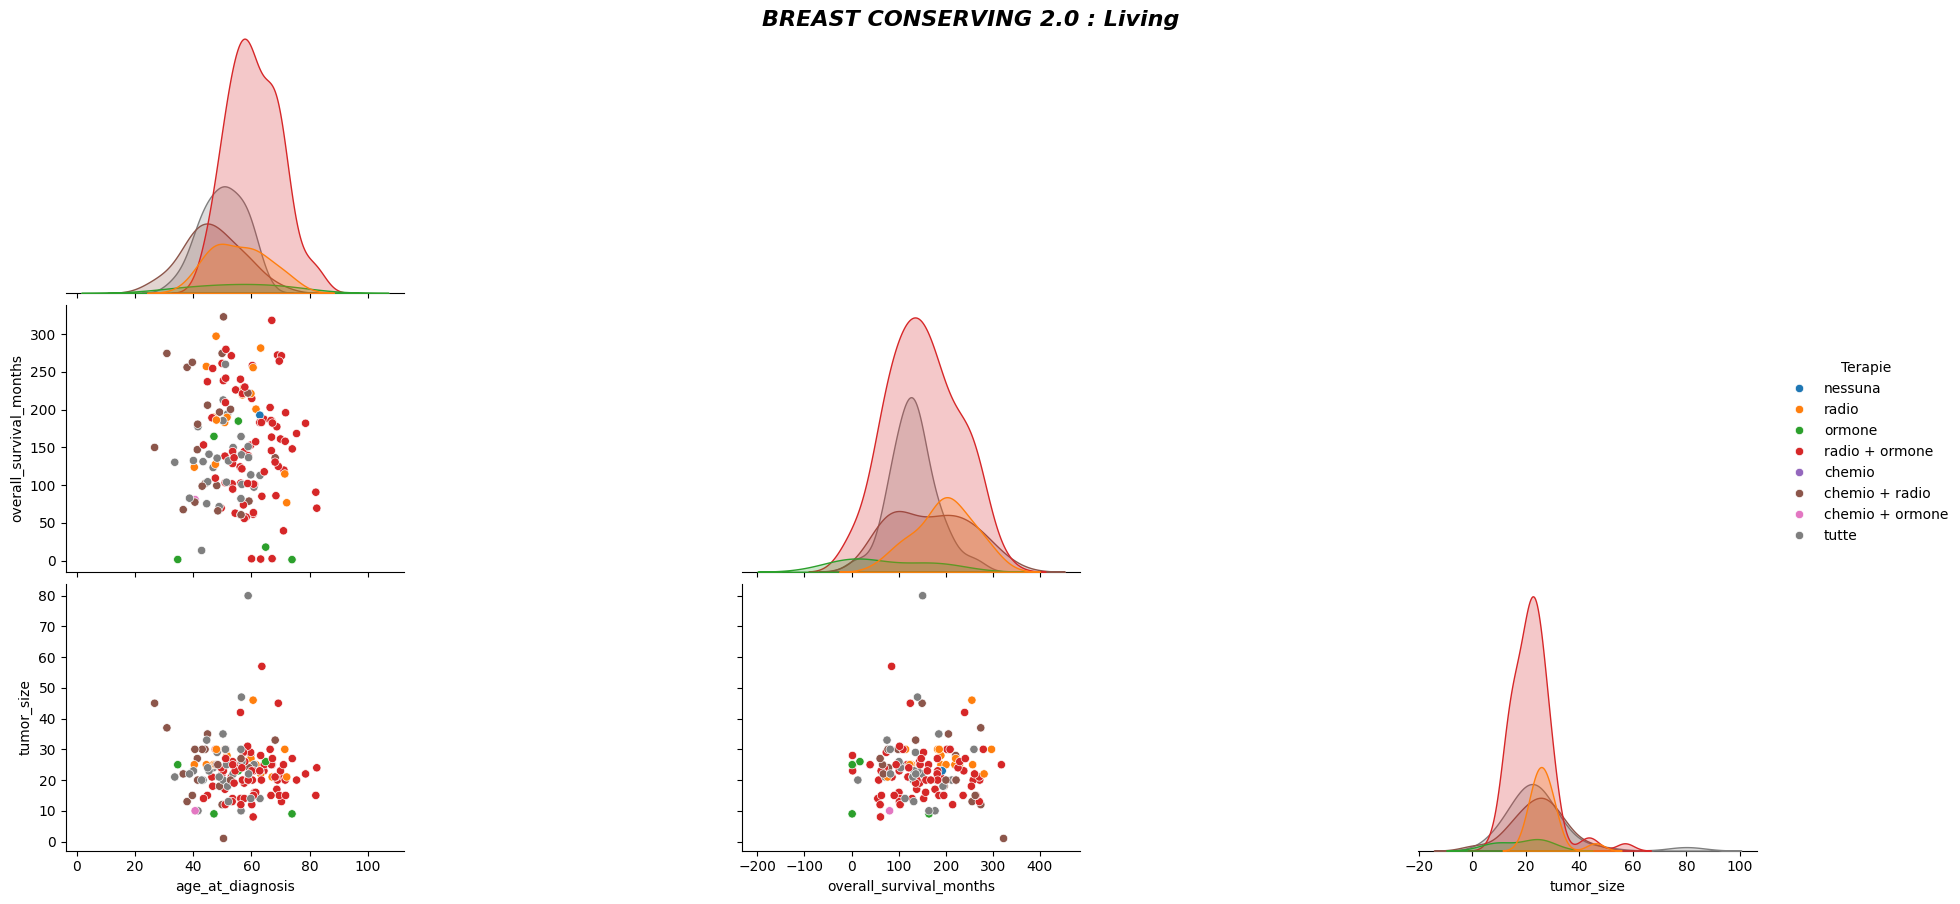

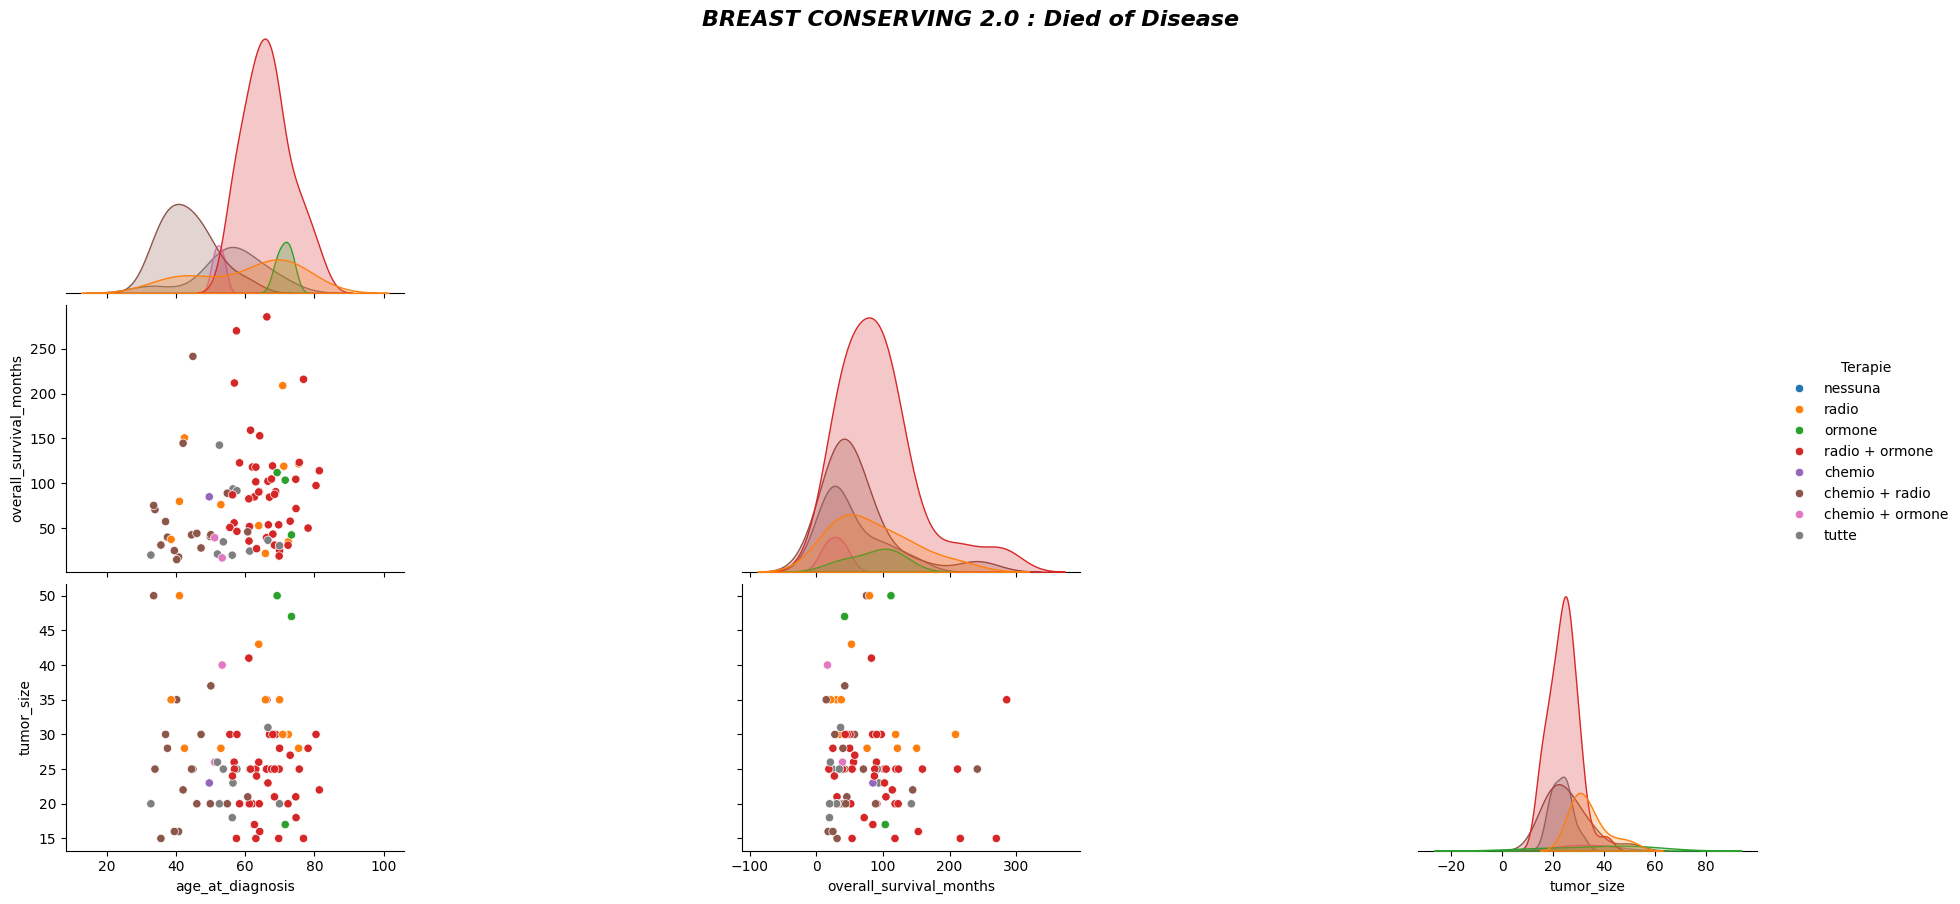

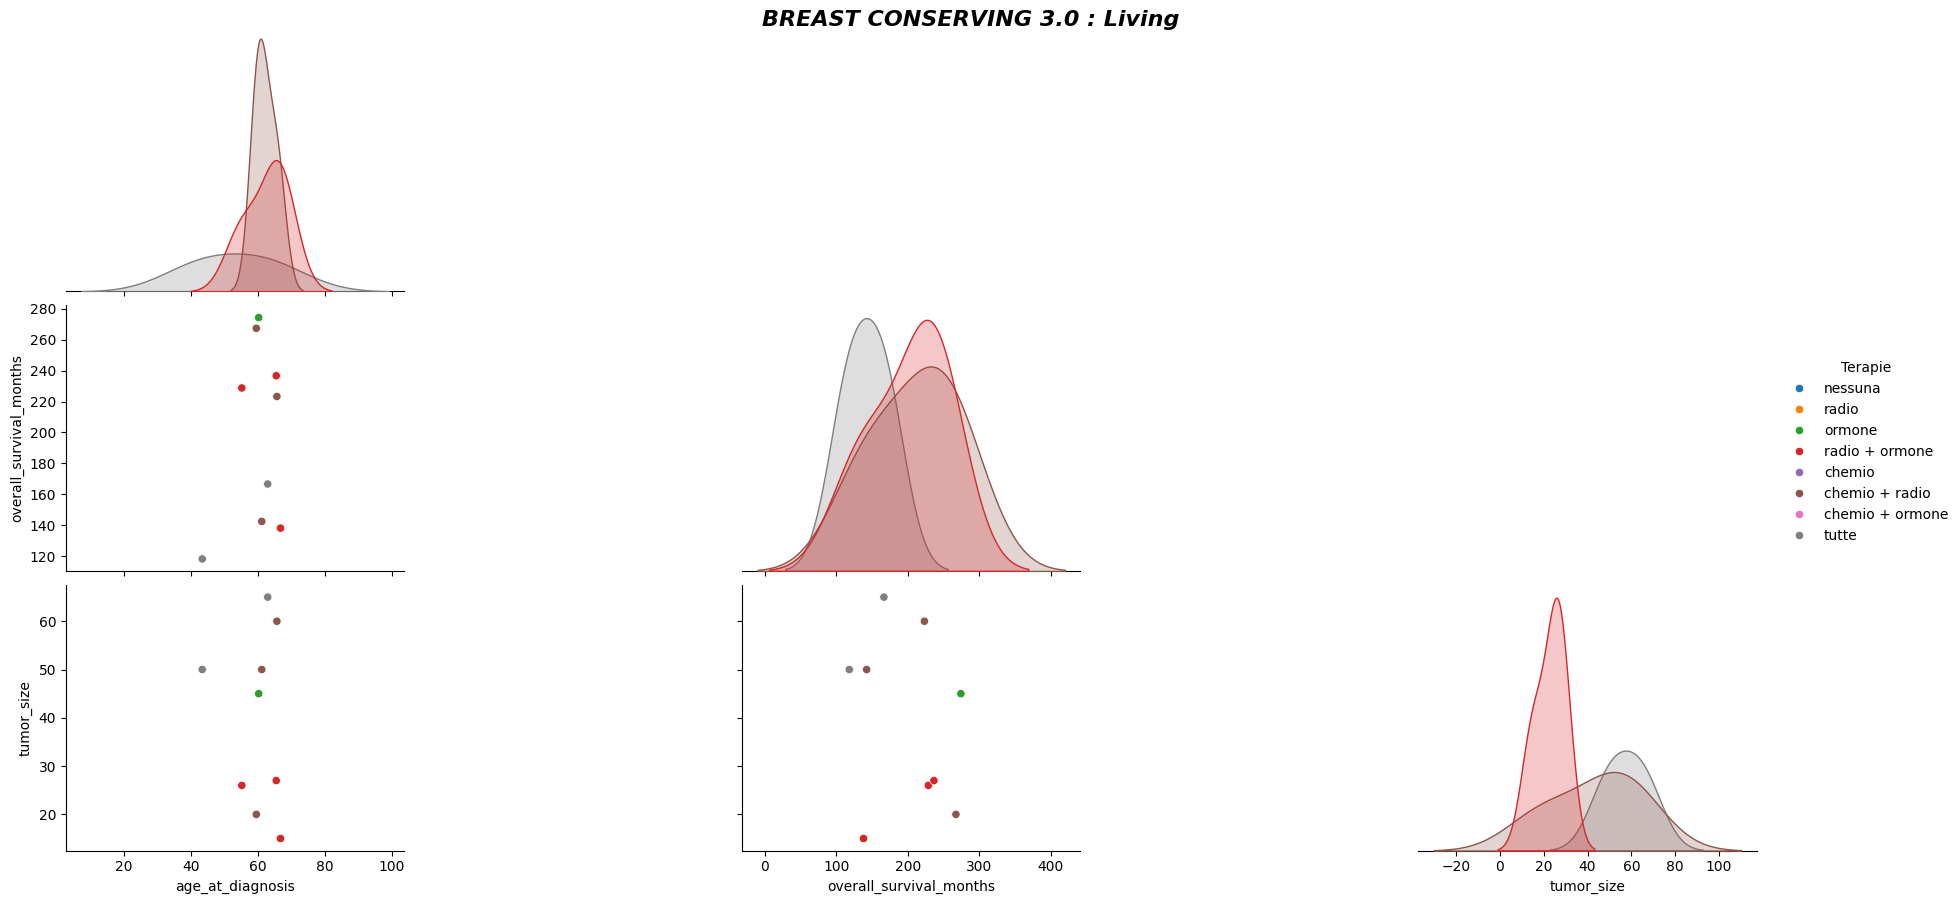

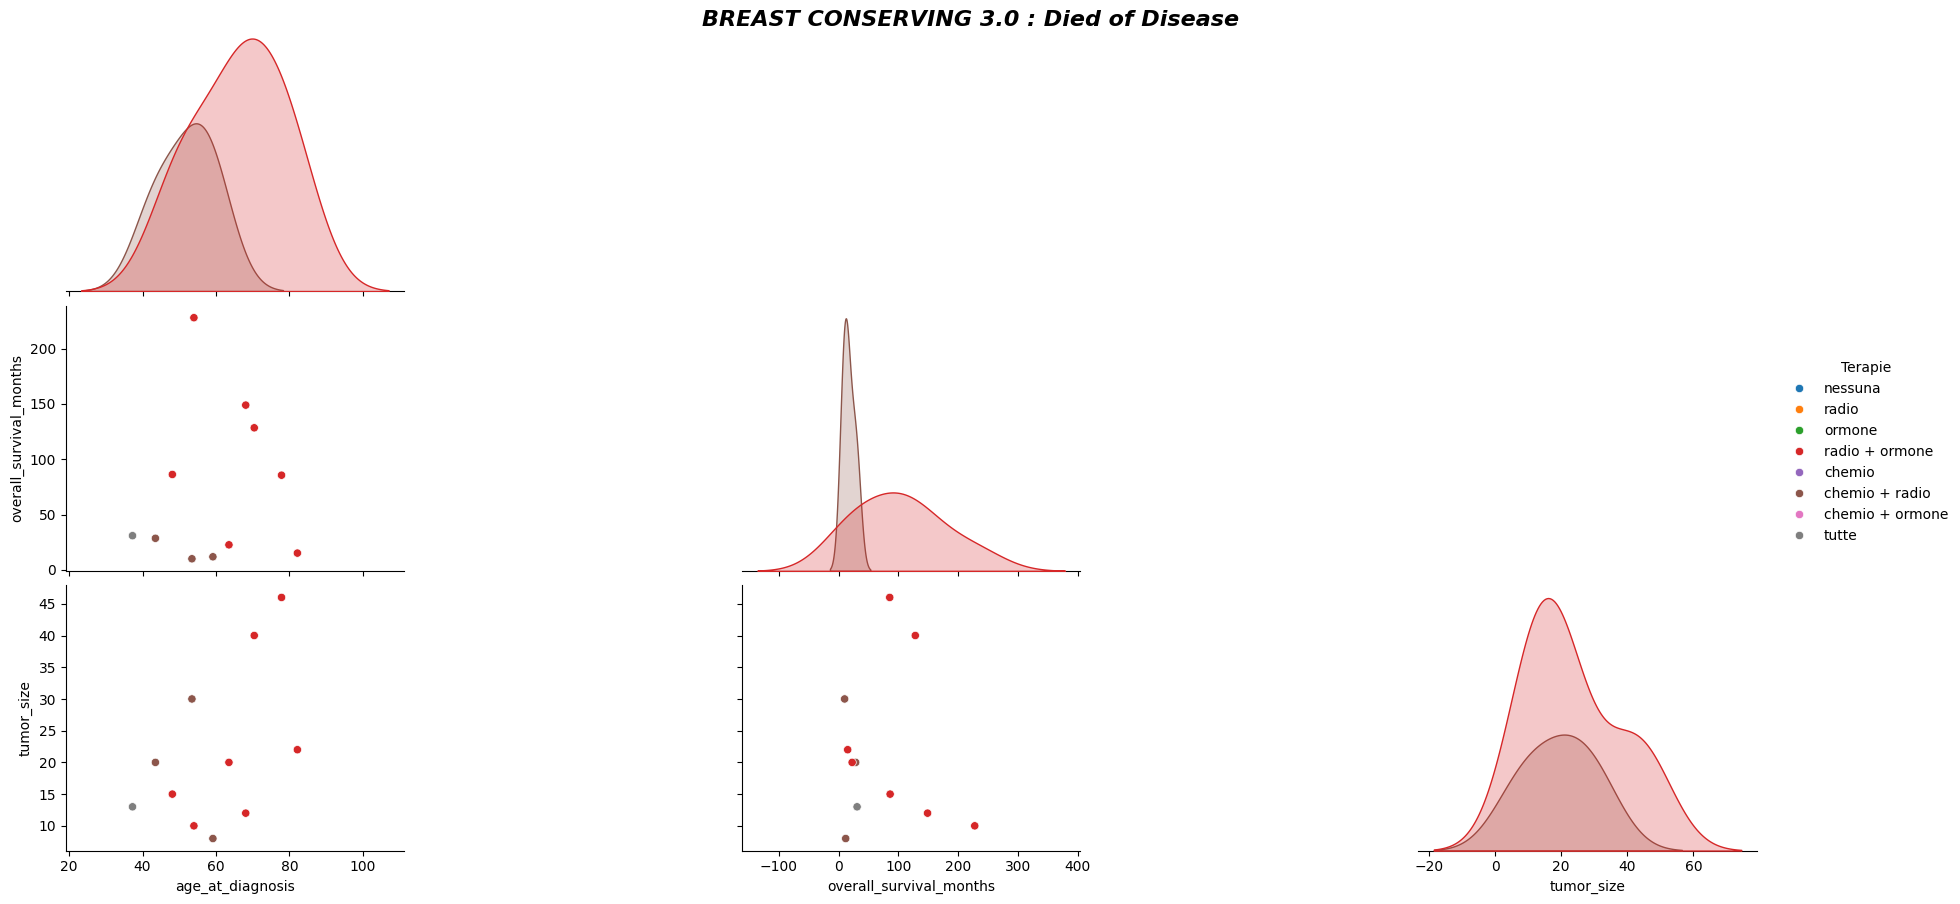

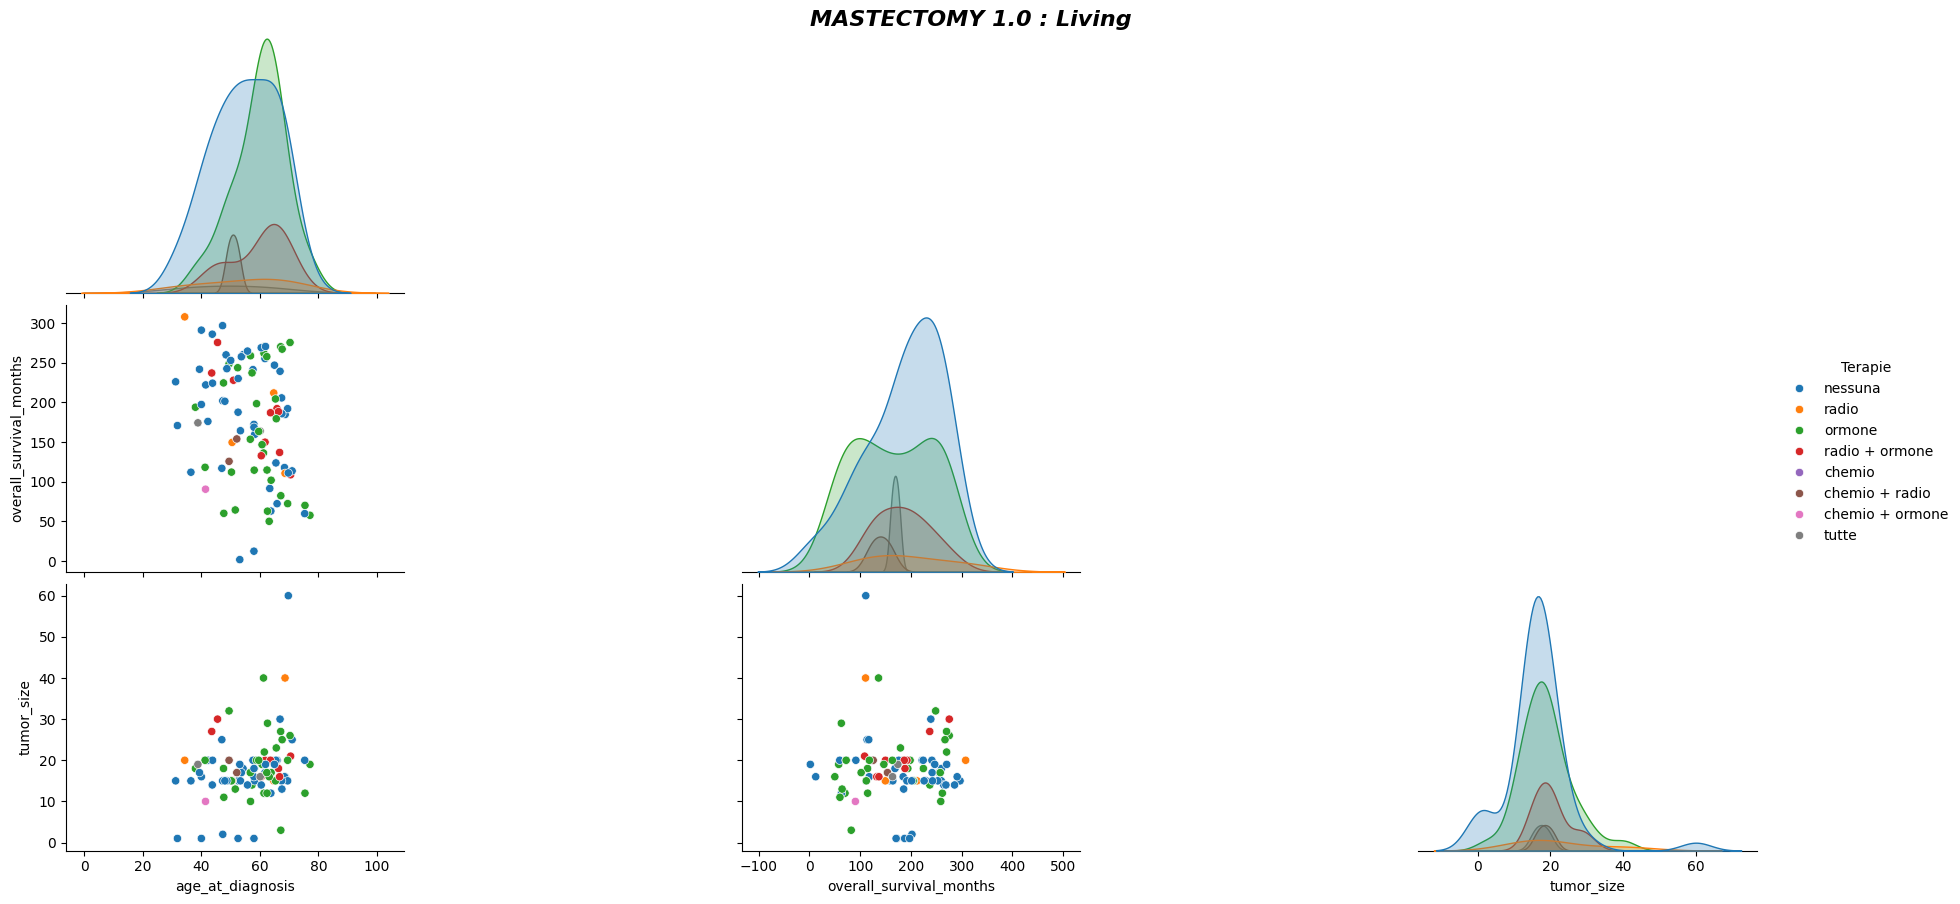

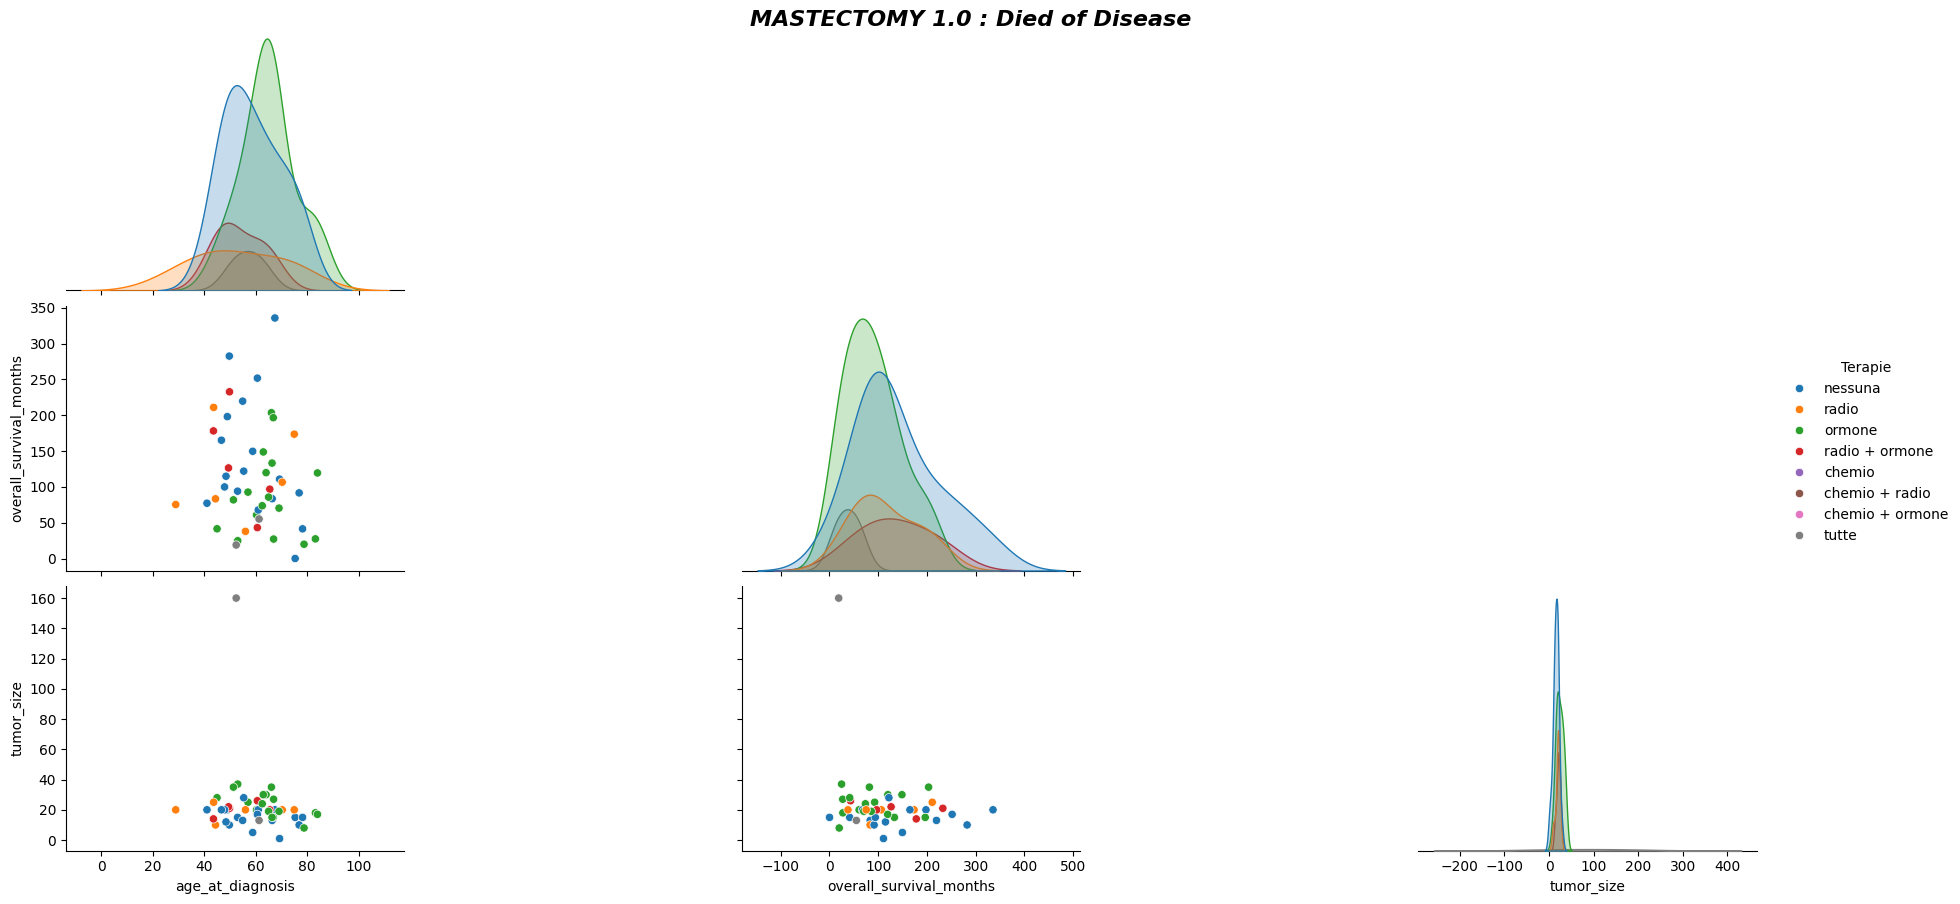

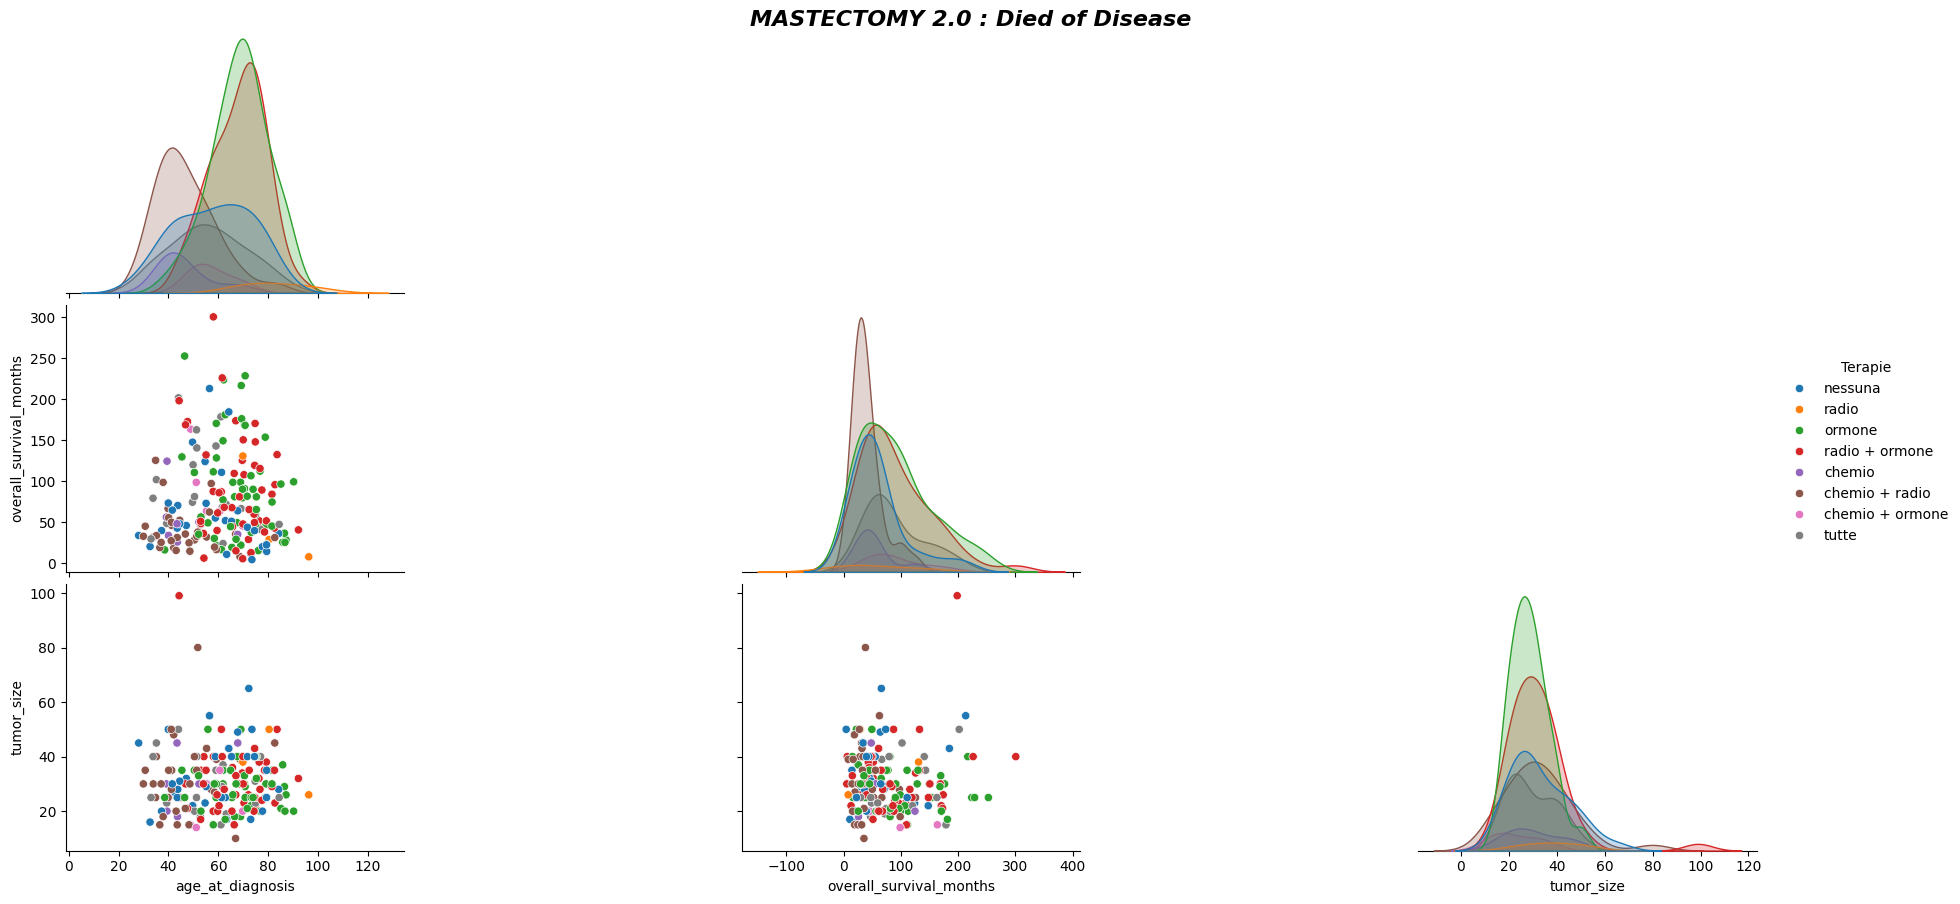

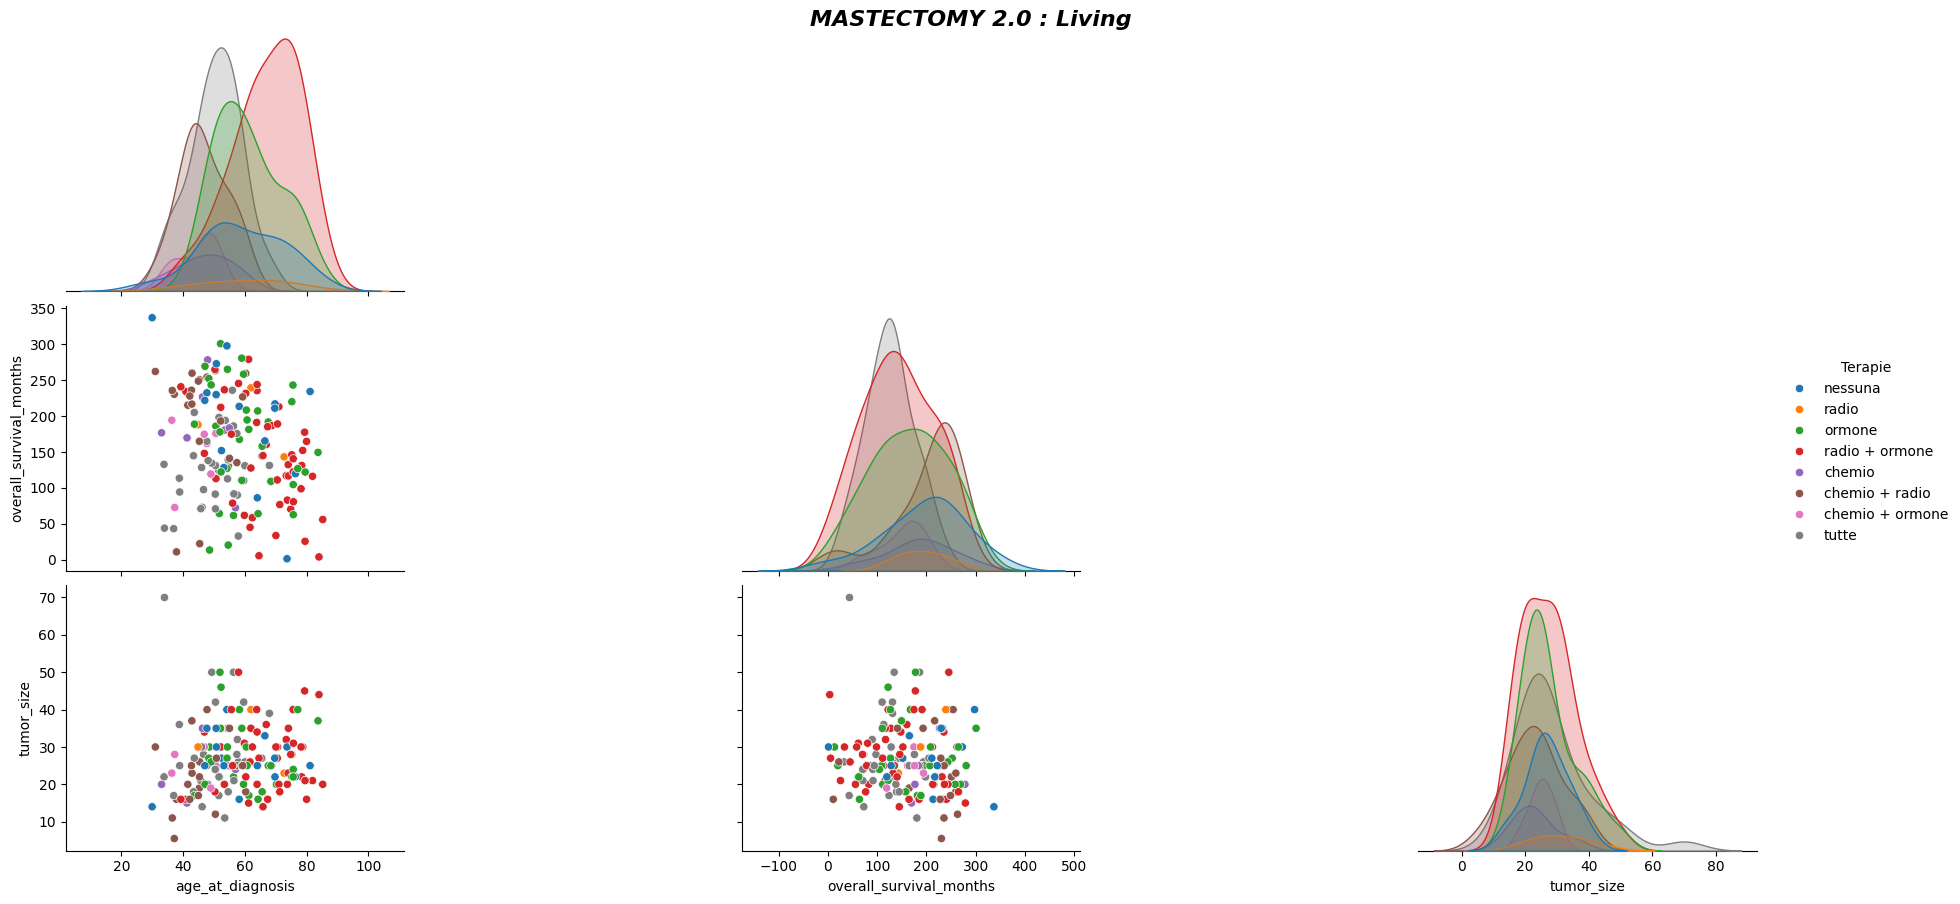

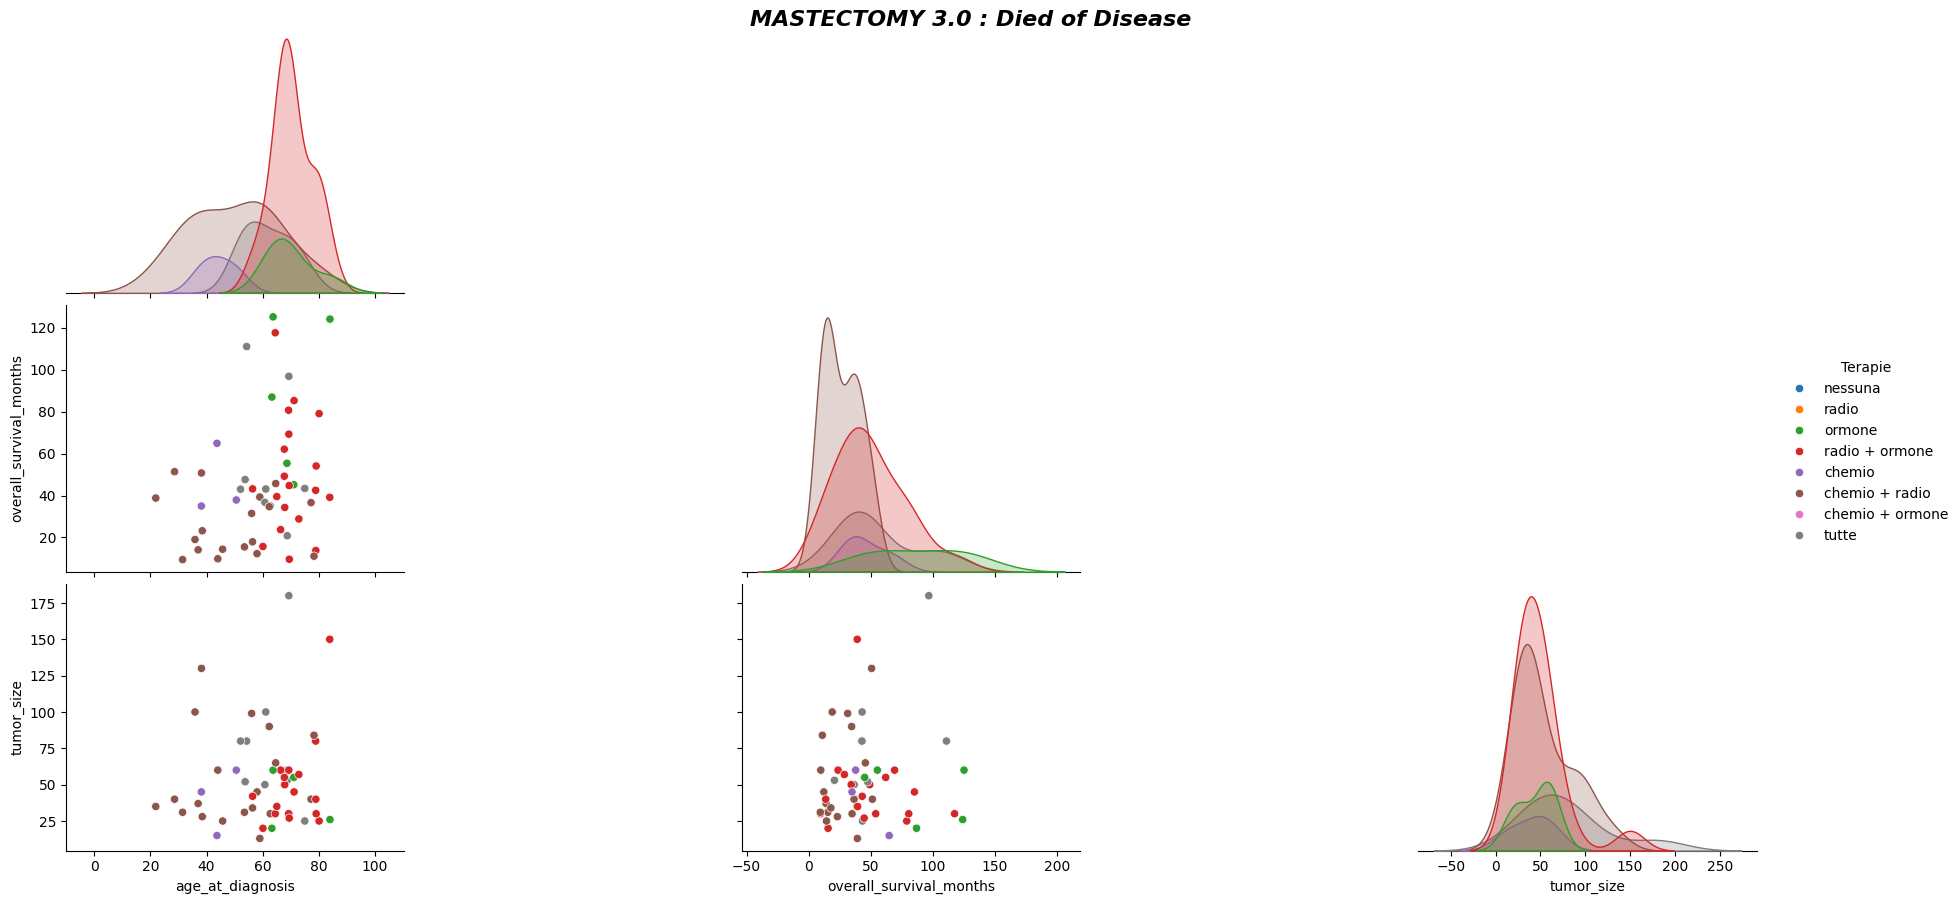

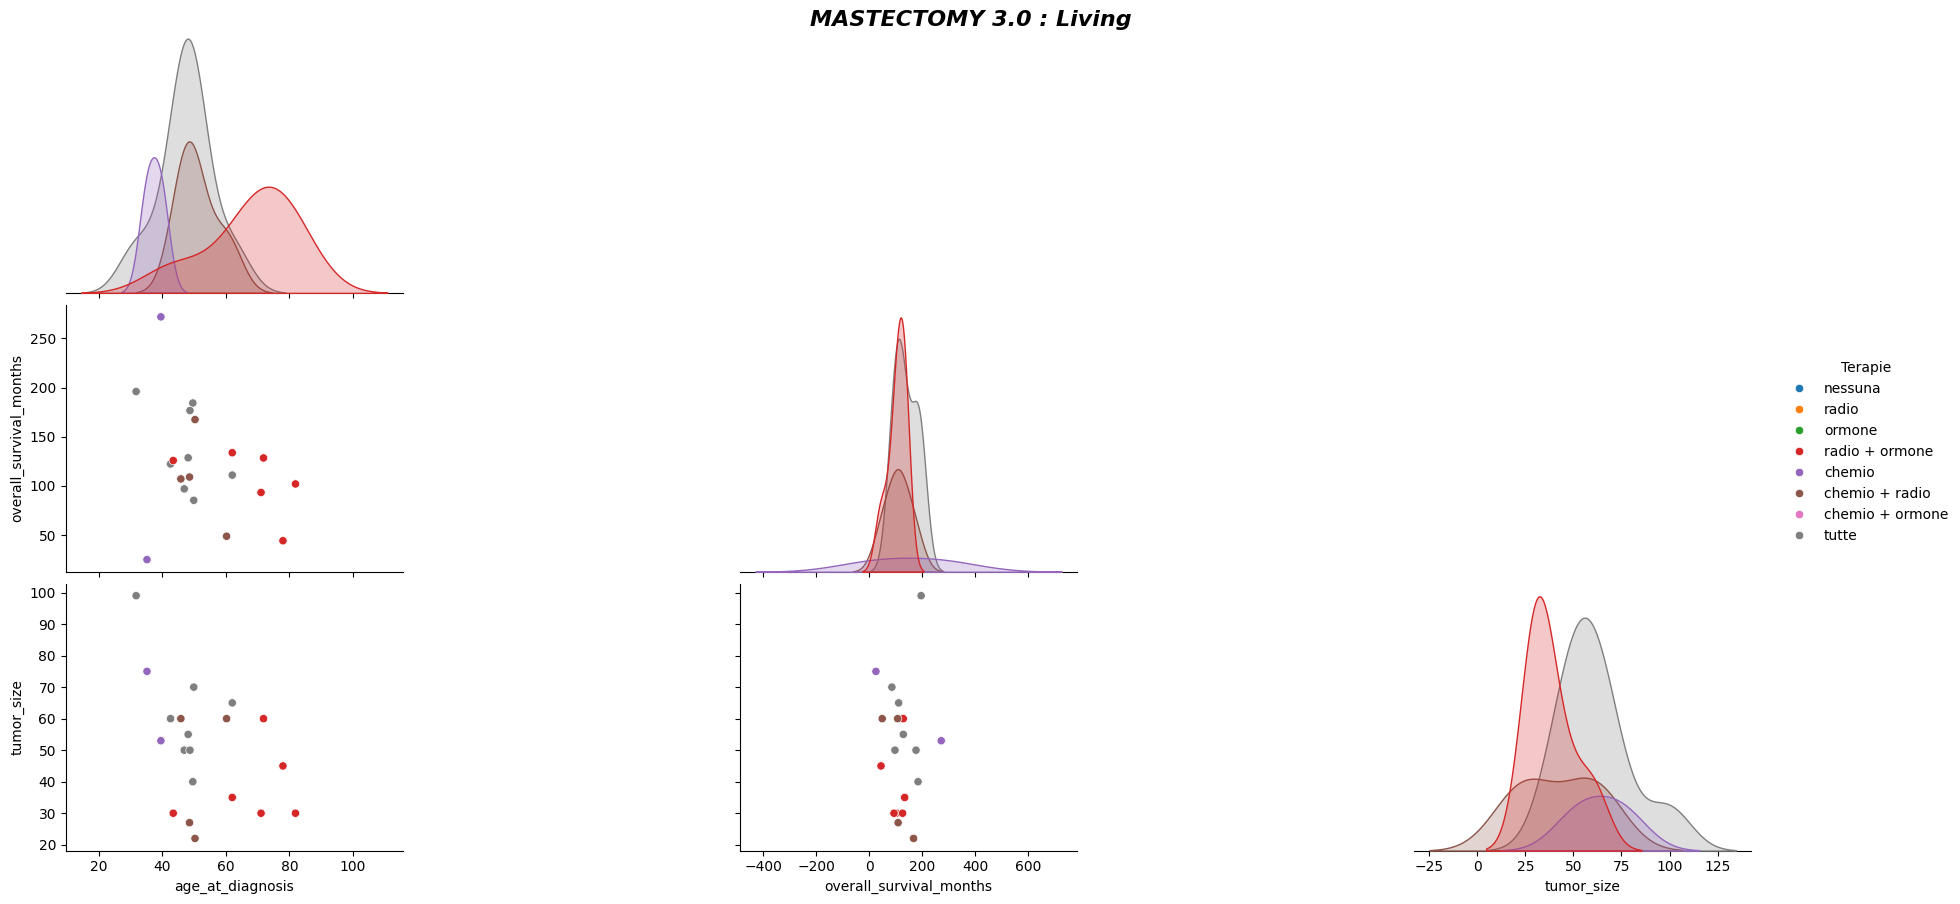

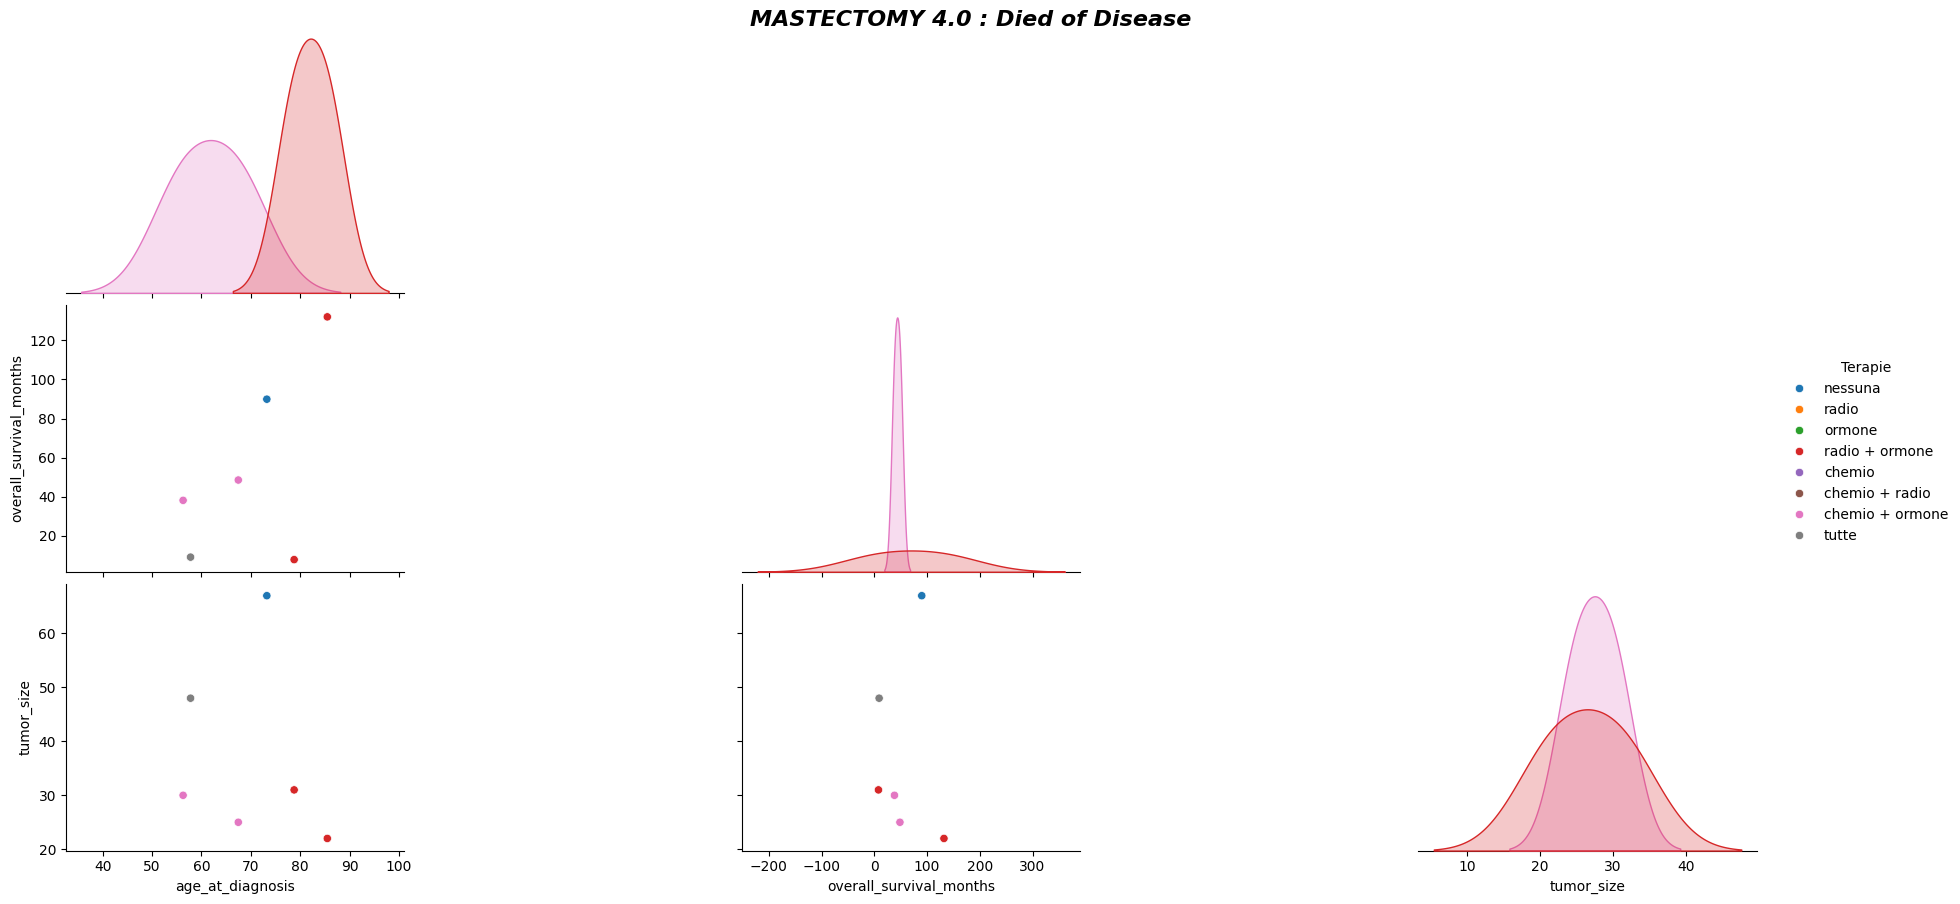

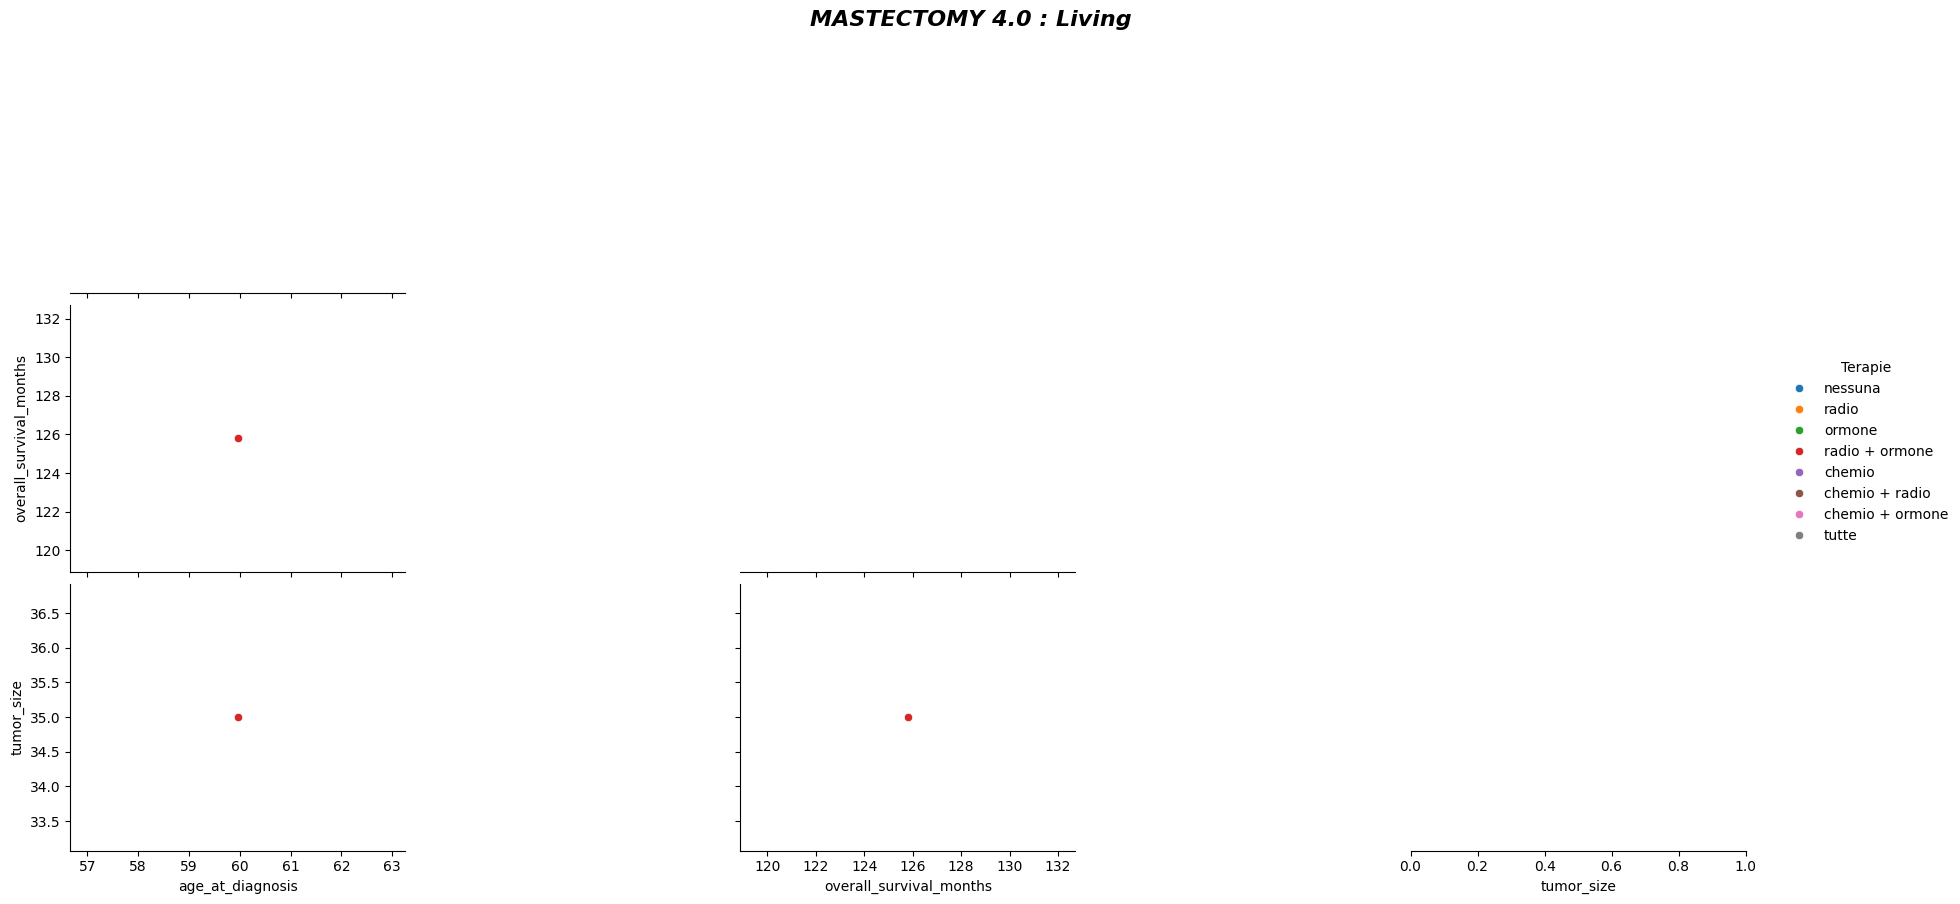

In [12]:
distribuzione_terapie = {}

for dataset in lista_terapie:
    for x in dataset['death_from_cancer'].unique():
        df_death = dataset[dataset['death_from_cancer'] == x]
        df_confronto = sns.pairplot(df_death, height=3, aspect=2, hue='Terapie', hue_order=lista_ordinata,
                                    vars=['age_at_diagnosis', 'overall_survival_months', 'tumor_size'], corner=True)
        df_confronto.fig.suptitle(f'{dataset['Operation_Stage'].iloc[0]} : {x}', y=1, style='italic', fontsize=16, fontweight='bold')
        plt.subplots_adjust(wspace=1)
        distribuzione_terapie[x] = df_confronto

In [13]:
risultati

[('BREAST CONSERVING 1.0',
  'radio + ormone',
  (np.float64(73.42), np.float64(26.58)),
  np.int64(79)),
 ('BREAST CONSERVING 1.0',
  'radio',
  (np.float64(74.29), np.float64(25.71)),
  np.int64(105)),
 ('BREAST CONSERVING 1.0',
  'tutte',
  (np.float64(33.33), np.float64(66.67)),
  np.int64(3)),
 ('BREAST CONSERVING 1.0', 'chemio', (0, np.float64(100.0)), np.int64(2)),
 ('BREAST CONSERVING 1.0',
  'nessuna',
  (np.float64(66.67), np.float64(33.33)),
  np.int64(12)),
 ('BREAST CONSERVING 1.0',
  'ormone',
  (np.float64(85.71), np.float64(14.29)),
  np.int64(14)),
 ('BREAST CONSERVING 1.0',
  'chemio + radio',
  (np.float64(60.0), np.float64(40.0)),
  np.int64(5)),
 ('BREAST CONSERVING 2.0',
  'radio + ormone',
  (np.float64(63.48), np.float64(36.52)),
  np.int64(115)),
 ('BREAST CONSERVING 2.0',
  'radio',
  (np.float64(60.71), np.float64(39.29)),
  np.int64(28)),
 ('BREAST CONSERVING 2.0',
  'tutte',
  (np.float64(73.68), np.float64(26.32)),
  np.int64(38)),
 ('BREAST CONSERVING 2.0

In [14]:
ris = pd.DataFrame(risultati)
ris.columns = ['Operazione', 'Terapia', 'Percentuale(v/m)', 'Count']
ris

Operazione          Terapia Percentuale(v/m)  Count
0   BREAST CONSERVING 1.0   radio + ormone   (73.42, 26.58)     79
1   BREAST CONSERVING 1.0            radio   (74.29, 25.71)    105
2   BREAST CONSERVING 1.0            tutte   (33.33, 66.67)      3
3   BREAST CONSERVING 1.0           chemio       (0, 100.0)      2
4   BREAST CONSERVING 1.0          nessuna   (66.67, 33.33)     12
5   BREAST CONSERVING 1.0           ormone   (85.71, 14.29)     14
6   BREAST CONSERVING 1.0   chemio + radio     (60.0, 40.0)      5
7   BREAST CONSERVING 2.0   radio + ormone   (63.48, 36.52)    115
8   BREAST CONSERVING 2.0            radio   (60.71, 39.29)     28
9   BREAST CONSERVING 2.0            tutte   (73.68, 26.32)     38
10  BREAST CONSERVING 2.0   chemio + radio   (56.41, 43.59)     39
11  BREAST CONSERVING 2.0           ormone     (62.5, 37.5)      8
12  BREAST CONSERVING 2.0  chemio + ormone   (33.33, 66.67)      3
13  BREAST CONSERVING 2.0          nessuna       (100.0, 0)      1
14  BREAST CONSERVING 2.0           chemio       (0, 100.0)      1
15  BREAST CONSERVING 3.0           ormone       (100.0, 0)      1
16  BREAST CONSERVING 3.0   chemio + radio     (50.0, 50.0)      6
17  BREAST CONSERVING 3.0   radio + ormone     (30.0, 70.0)     10
18  BREAST CONSERVING 3.0            tutte   (66.67, 33.33)      3
19         MASTECTOMY 1.0          nessuna   (71.88, 28.12)     64
20         MASTECTOMY 1.0           ormone     (66.0, 34.0)     50
21         MASTECTOMY 1.0   radio + ormone   (66.67, 33.33)     15
22         MASTECTOMY 1.0            radio     (40.0, 60.0)     10
23         MASTECTOMY 1.0            tutte     (50.0, 50.0)      4
24         MASTECTOMY 1.0   chemio + radio       (100.0, 0)      2
25         MASTECTOMY 1.0  chemio + ormone       (100.0, 0)      1
26         MASTECTOMY 2.0   radio + ormone     (50.0, 50.0)     94
27         MASTECTOMY 2.0            tutte   (61.11, 38.89)     54
28         MASTECTOMY 2.0   chemio + radio   (41.51, 58.49)     53
29         MASTECTOMY 2.0            radio     (50.0, 50.0)      6
30         MASTECTOMY 2.0           ormone   (39.08, 60.92)     87
31         MASTECTOMY 2.0           chemio   (46.15, 53.85)     13
32         MASTECTOMY 2.0          nessuna   (34.04, 65.96)     47
33         MASTECTOMY 2.0  chemio + ormone   (54.55, 45.45)     11
34         MASTECTOMY 3.0   chemio + radio   (17.39, 82.61)     23
35         MASTECTOMY 3.0   radio + ormone     (24.0, 76.0)     25
36         MASTECTOMY 3.0           chemio     (40.0, 60.0)      5
37         MASTECTOMY 3.0            tutte     (50.0, 50.0)     16
38         MASTECTOMY 3.0           ormone       (0, 100.0)      5
39         MASTECTOMY 4.0  chemio + ormone       (0, 100.0)      2
40         MASTECTOMY 4.0   radio + ormone   (33.33, 66.67)      3
41         MASTECTOMY 4.0            tutte       (0, 100.0)      1
42         MASTECTOMY 4.0          nessuna       (0, 100.0)      1

In [15]:
ris['Probabilità_Evento'] = ((ris['Count'] / ris['Count'].sum())*100).round(2)
ris

Operazione          Terapia Percentuale(v/m)  Count  \
0   BREAST CONSERVING 1.0   radio + ormone   (73.42, 26.58)     79   
1   BREAST CONSERVING 1.0            radio   (74.29, 25.71)    105   
2   BREAST CONSERVING 1.0            tutte   (33.33, 66.67)      3   
3   BREAST CONSERVING 1.0           chemio       (0, 100.0)      2   
4   BREAST CONSERVING 1.0          nessuna   (66.67, 33.33)     12   
5   BREAST CONSERVING 1.0           ormone   (85.71, 14.29)     14   
6   BREAST CONSERVING 1.0   chemio + radio     (60.0, 40.0)      5   
7   BREAST CONSERVING 2.0   radio + ormone   (63.48, 36.52)    115   
8   BREAST CONSERVING 2.0            radio   (60.71, 39.29)     28   
9   BREAST CONSERVING 2.0            tutte   (73.68, 26.32)     38   
10  BREAST CONSERVING 2.0   chemio + radio   (56.41, 43.59)     39   
11  BREAST CONSERVING 2.0           ormone     (62.5, 37.5)      8   
12  BREAST CONSERVING 2.0  chemio + ormone   (33.33, 66.67)      3   
13  BREAST CONSERVING 2.0          nessuna       (100.0, 0)      1   
14  BREAST CONSERVING 2.0           chemio       (0, 100.0)      1   
15  BREAST CONSERVING 3.0           ormone       (100.0, 0)      1   
16  BREAST CONSERVING 3.0   chemio + radio     (50.0, 50.0)      6   
17  BREAST CONSERVING 3.0   radio + ormone     (30.0, 70.0)     10   
18  BREAST CONSERVING 3.0            tutte   (66.67, 33.33)      3   
19         MASTECTOMY 1.0          nessuna   (71.88, 28.12)     64   
20         MASTECTOMY 1.0           ormone     (66.0, 34.0)     50   
21         MASTECTOMY 1.0   radio + ormone   (66.67, 33.33)     15   
22         MASTECTOMY 1.0            radio     (40.0, 60.0)     10   
23         MASTECTOMY 1.0            tutte     (50.0, 50.0)      4   
24         MASTECTOMY 1.0   chemio + radio       (100.0, 0)      2   
25         MASTECTOMY 1.0  chemio + ormone       (100.0, 0)      1   
26         MASTECTOMY 2.0   radio + ormone     (50.0, 50.0)     94   
27         MASTECTOMY 2.0            tutte   (61.11, 38.89)     54   
28         MASTECTOMY 2.0   chemio + radio   (41.51, 58.49)     53   
29         MASTECTOMY 2.0            radio     (50.0, 50.0)      6   
30         MASTECTOMY 2.0           ormone   (39.08, 60.92)     87   
31         MASTECTOMY 2.0           chemio   (46.15, 53.85)     13   
32         MASTECTOMY 2.0          nessuna   (34.04, 65.96)     47   
33         MASTECTOMY 2.0  chemio + ormone   (54.55, 45.45)     11   
34         MASTECTOMY 3.0   chemio + radio   (17.39, 82.61)     23   
35         MASTECTOMY 3.0   radio + ormone     (24.0, 76.0)     25   
36         MASTECTOMY 3.0           chemio     (40.0, 60.0)      5   
37         MASTECTOMY 3.0            tutte     (50.0, 50.0)     16   
38         MASTECTOMY 3.0           ormone       (0, 100.0)      5   
39         MASTECTOMY 4.0  chemio + ormone       (0, 100.0)      2   
40         MASTECTOMY 4.0   radio + ormone   (33.33, 66.67)      3   
41         MASTECTOMY 4.0            tutte       (0, 100.0)      1   
42         MASTECTOMY 4.0          nessuna       (0, 100.0)      1   

    Probabilità_Evento  
0                 7.42  
1                 9.86  
2                 0.28  
3                 0.19  
4                 1.13  
5                 1.31  
6                 0.47  
7                10.80  
8                 2.63  
9                 3.57  
10                3.66  
11                0.75  
12                0.28  
13                0.09  
14                0.09  
15                0.09  
16                0.56  
17                0.94  
18                0.28  
19                6.01  
20                4.69  
21                1.41  
22                0.94  
23                0.38  
24                0.19  
25                0.09  
26                8.83  
27                5.07  
28                4.98  
29                0.56  
30                8.17  
31                1.22  
32                4.41  
33                1.03  
34                2.16  
35                2.35  
36       

In [16]:
lista_terapie

[     age_at_diagnosis  overall_survival_months death_from_cancer  tumor_size  \
 0               56.79                    44.83   Died of Disease        16.0   
 1               76.06                   198.30            Living        20.0   
 2               60.96                    14.17   Died of Disease        18.0   
 3               61.78                   163.73            Living        15.0   
 4               55.53                   190.17            Living        15.0   
 ..                ...                      ...               ...         ...   
 215             70.91                   163.53            Living        21.0   
 216             61.81                   224.23            Living        15.0   
 217             61.16                   256.87   Died of Disease        15.0   
 218             50.21                   123.90            Living        18.0   
 219             63.10                   108.43            Living        18.0   
 
     COR_Terapie         T

In [17]:
df_living = df_nuovo[df_nuovo['death_from_cancer'] == 'Living']
df_living

age_at_diagnosis  overall_survival_months death_from_cancer  tumor_size  \
1                76.06                   198.30            Living        20.0   
3                61.78                   163.73            Living        15.0   
4                55.53                   190.17            Living        15.0   
6                49.02                   146.77            Living        20.0   
7                70.98                   142.43            Living         9.0   
...                ...                      ...               ...         ...   
1041             61.99                   133.73            Living        35.0   
1042             31.71                   195.93            Living        99.0   
1047             48.67                   176.60            Living        50.0   
1052             48.53                   109.00            Living        27.0   
1059             59.96                   125.80            Living        35.0   

     COR_Terapie         Terapie        Operation_Stage  
1      (0, 0, 1)           radio  BREAST CONSERVING 1.0  
3      (0, 0, 1)           radio  BREAST CONSERVING 1.0  
4      (0, 0, 1)           radio  BREAST CONSERVING 1.0  
6      (0, 0, 1)           radio  BREAST CONSERVING 1.0  
7      (0, 1, 1)  radio + ormone  BREAST CONSERVING 1.0  
...          ...             ...                    ...  
1041   (0, 1, 1)  radio + ormone         MASTECTOMY 3.0  
1042   (1, 1, 1)           tutte         MASTECTOMY 3.0  
1047   (1, 1, 1)           tutte         MASTECTOMY 3.0  
1052   (1, 0, 1)  chemio + radio         MASTECTOMY 3.0  
1059   (0, 1, 1)  radio + ormone         MASTECTOMY 4.0  

[602 rows x 7 columns]

In [18]:
generale = []

for operazione in df_living['Operation_Stage'].unique():
    for cura in df_living['Terapie'].unique():
        df_periodo = df_living[(df_living['Operation_Stage'] == operazione) & (df_living['Terapie'] == cura)]

        if df_periodo.empty:
            continue
        
        media = (df_periodo['overall_survival_months'].mean()).round(2)
        minimo = df_periodo['overall_survival_months'].min()
        massimo = df_periodo['overall_survival_months'].max()
        mediana = (df_periodo['overall_survival_months'].median()).round(2)
        
    
        generale.append({
            'Operation_Stage': operazione,
            'Cura': cura,
            'Media': media,
            'Minimo': minimo,
            'Massimo': massimo,
            'Mediana': mediana
        })
    
        df_mesi_vita = pd.DataFrame(generale)
display(df_mesi_vita)

Operation_Stage             Cura   Media  Minimo  Massimo  Mediana
0   BREAST CONSERVING 1.0            radio  205.10   34.10   307.63   204.44
1   BREAST CONSERVING 1.0   radio + ormone  146.28   23.80   274.03   143.53
2   BREAST CONSERVING 1.0           ormone  155.87   88.20   217.77   151.44
3   BREAST CONSERVING 1.0   chemio + radio   88.87   75.40   114.47    76.73
4   BREAST CONSERVING 1.0          nessuna  191.66   99.23   265.93   212.30
5   BREAST CONSERVING 1.0            tutte   86.80   86.80    86.80    86.80
6   BREAST CONSERVING 2.0            radio  196.32   76.63   297.23   189.87
7   BREAST CONSERVING 2.0   radio + ormone  151.40    2.00   318.20   145.63
8   BREAST CONSERVING 2.0           ormone   73.96    1.27   184.77    17.83
9   BREAST CONSERVING 2.0   chemio + radio  168.18   60.67   322.83   165.25
10  BREAST CONSERVING 2.0          nessuna  192.60  192.60   192.60   192.60
11  BREAST CONSERVING 2.0            tutte  130.52   13.40   259.93   131.57
12  BREAST CONSERVING 2.0  chemio + ormone   80.83   80.83    80.83    80.83
13  BREAST CONSERVING 3.0   radio + ormone  201.21  138.13   236.70   228.80
14  BREAST CONSERVING 3.0           ormone  274.37  274.37   274.37   274.37
15  BREAST CONSERVING 3.0   chemio + radio  211.06  142.47   267.40   223.30
16  BREAST CONSERVING 3.0            tutte  142.44  118.20   166.67   142.44
17         MASTECTOMY 1.0            radio  195.03  110.63   307.93   180.78
18         MASTECTOMY 1.0   radio + ormone  183.67  108.77   275.63   187.70
19         MASTECTOMY 1.0           ormone  165.42   50.07   275.60   163.40
20         MASTECTOMY 1.0   chemio + radio  139.84  125.70   153.97   139.84
21         MASTECTOMY 1.0          nessuna  187.92    1.77   296.87   199.45
22         MASTECTOMY 1.0            tutte  169.07  163.87   174.27   169.07
23         MASTECTOMY 1.0  chemio + ormone   90.57   90.57    90.57    90.57
24         MASTECTOMY 2.0            radio  190.14  143.17   239.33   187.93
25         MASTECTOMY 2.0   radio + ormone  141.76    3.77   279.10   140.50
26         MASTECTOMY 2.0           ormone  163.64   13.40   300.87   172.70
27         MASTECTOMY 2.0   chemio + radio  200.65   10.83   263.23   228.63
28         MASTECTOMY 2.0          nessuna  195.01    1.23   337.03   215.24
29         MASTECTOMY 2.0            tutte  125.91   32.87   236.03   130.90
30         MASTECTOMY 2.0  chemio + ormone  149.73   72.67   194.20   168.20
31         MASTECTOMY 2.0           chemio  184.51   72.27   278.27   180.06
32         MASTECTOMY 3.0   radio + ormone  104.57   44.23   133.73   113.88
33         MASTECTOMY 3.0   chemio + radio  108.08   48.80   167.43   108.04
34         MASTECTOMY 3.0            tutte  137.61   85.33   195.93   125.42
35         MASTECTOMY 3.0           chemio  148.45   25.03   271.87   148.45
36         MASTECTOMY 4.0   radio + ormone  125.80  125.80   125.80   125.80

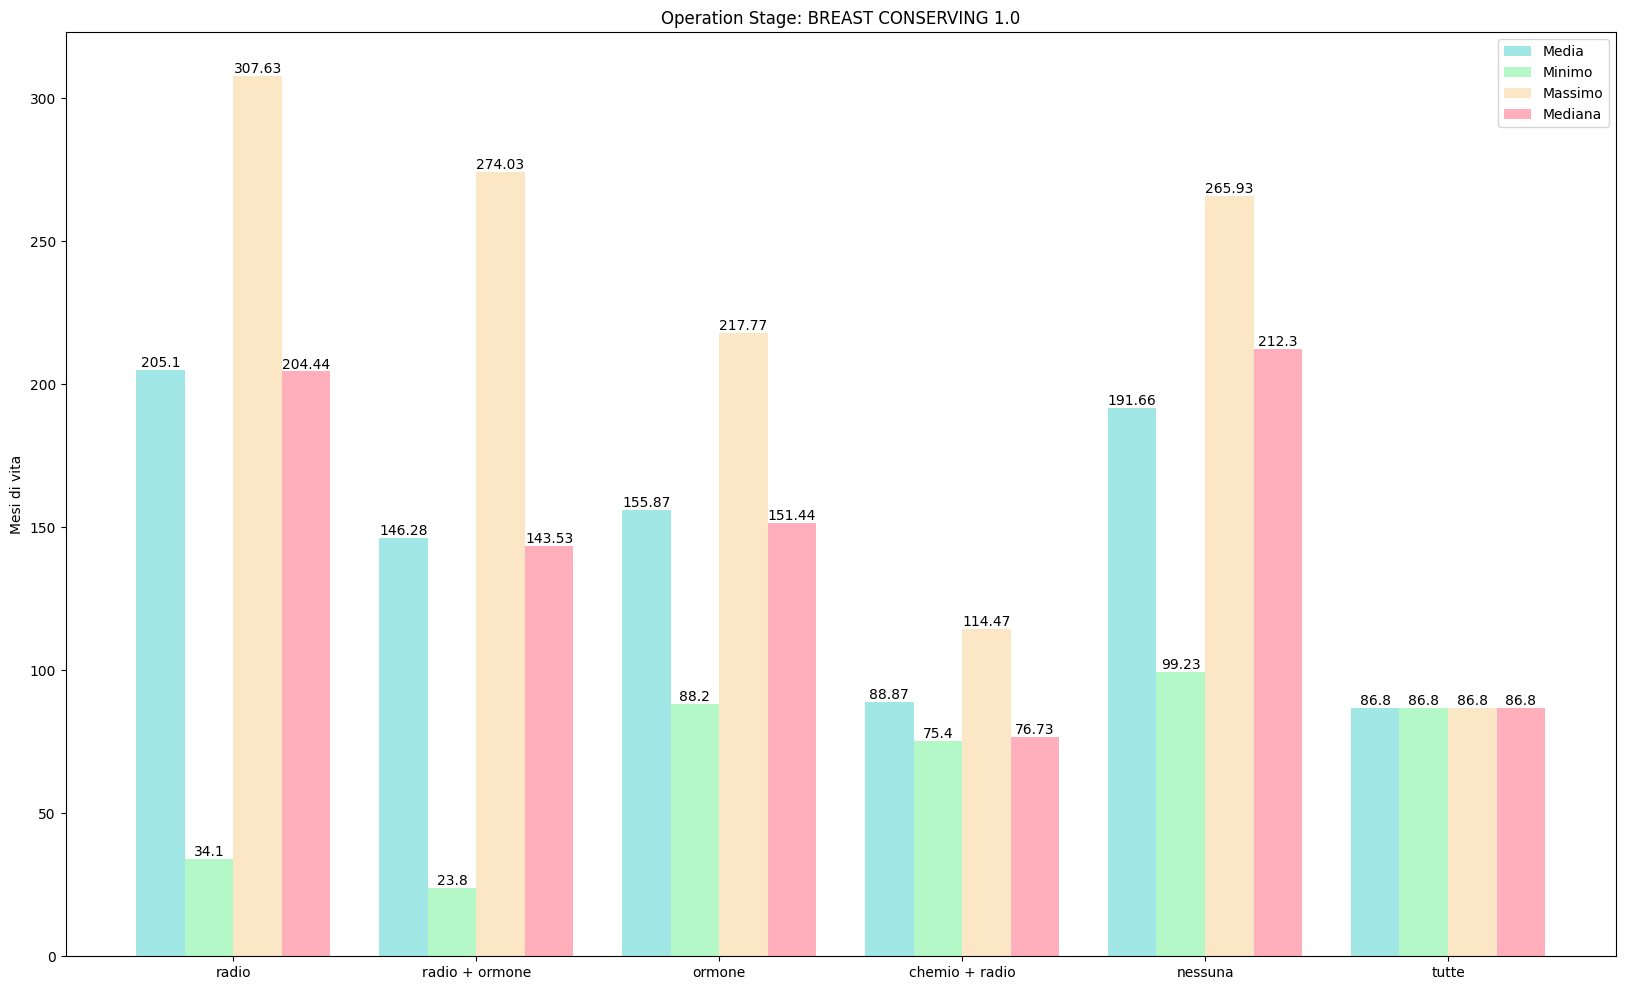

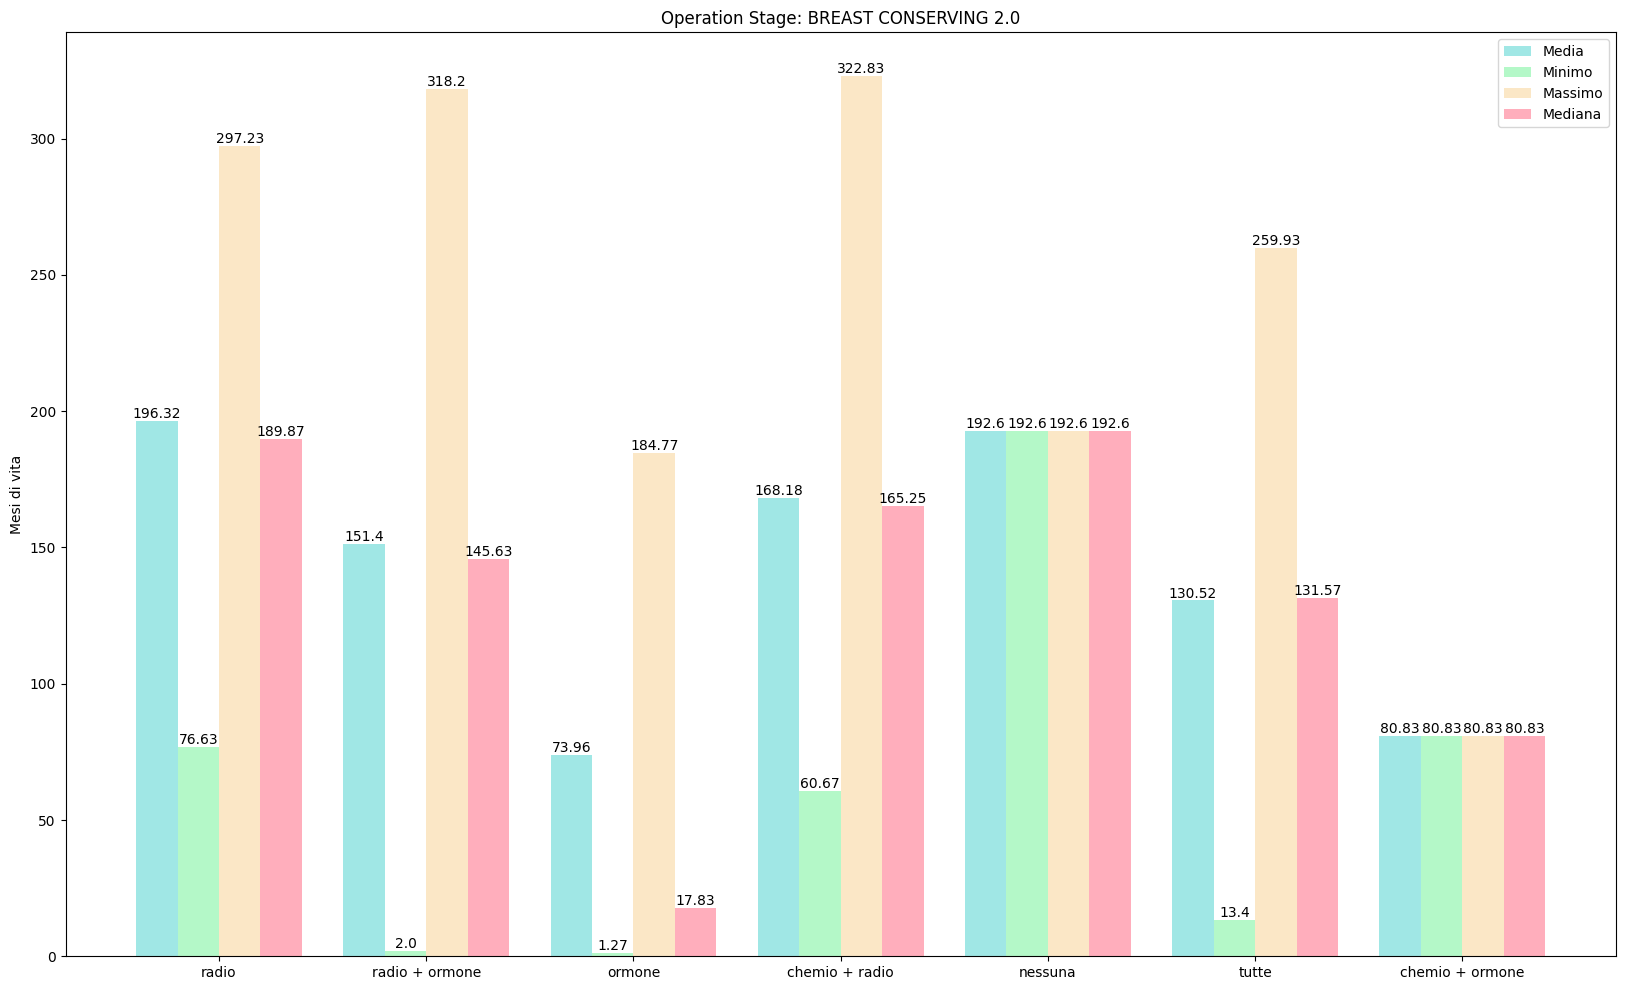

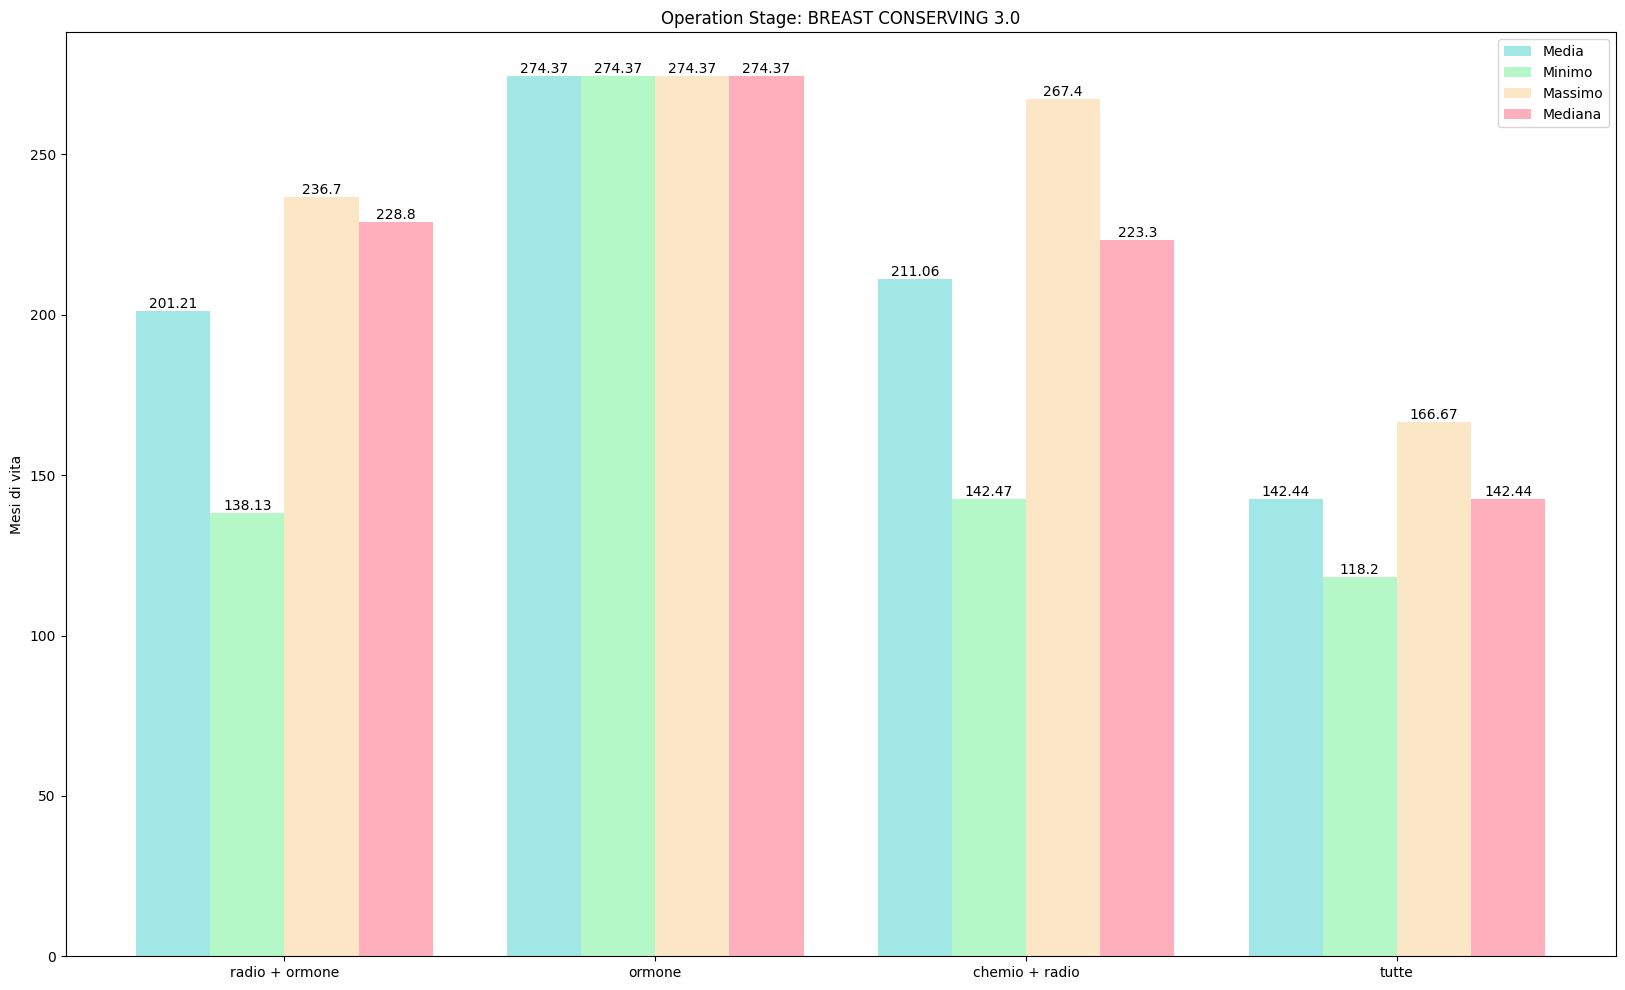

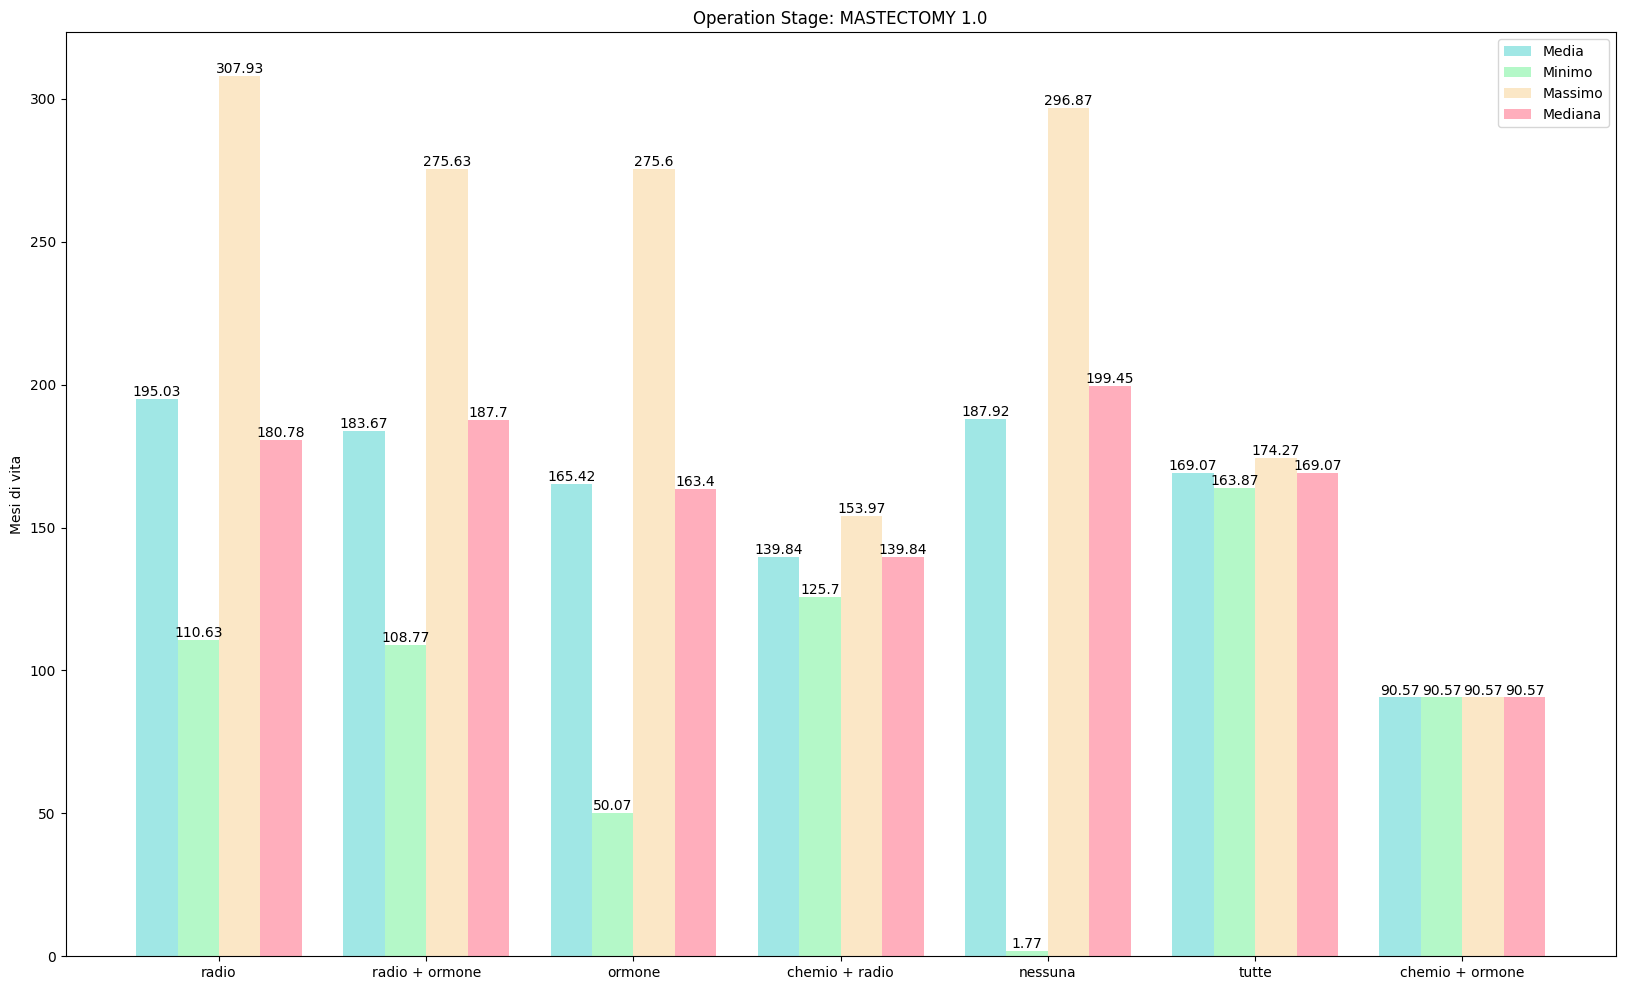

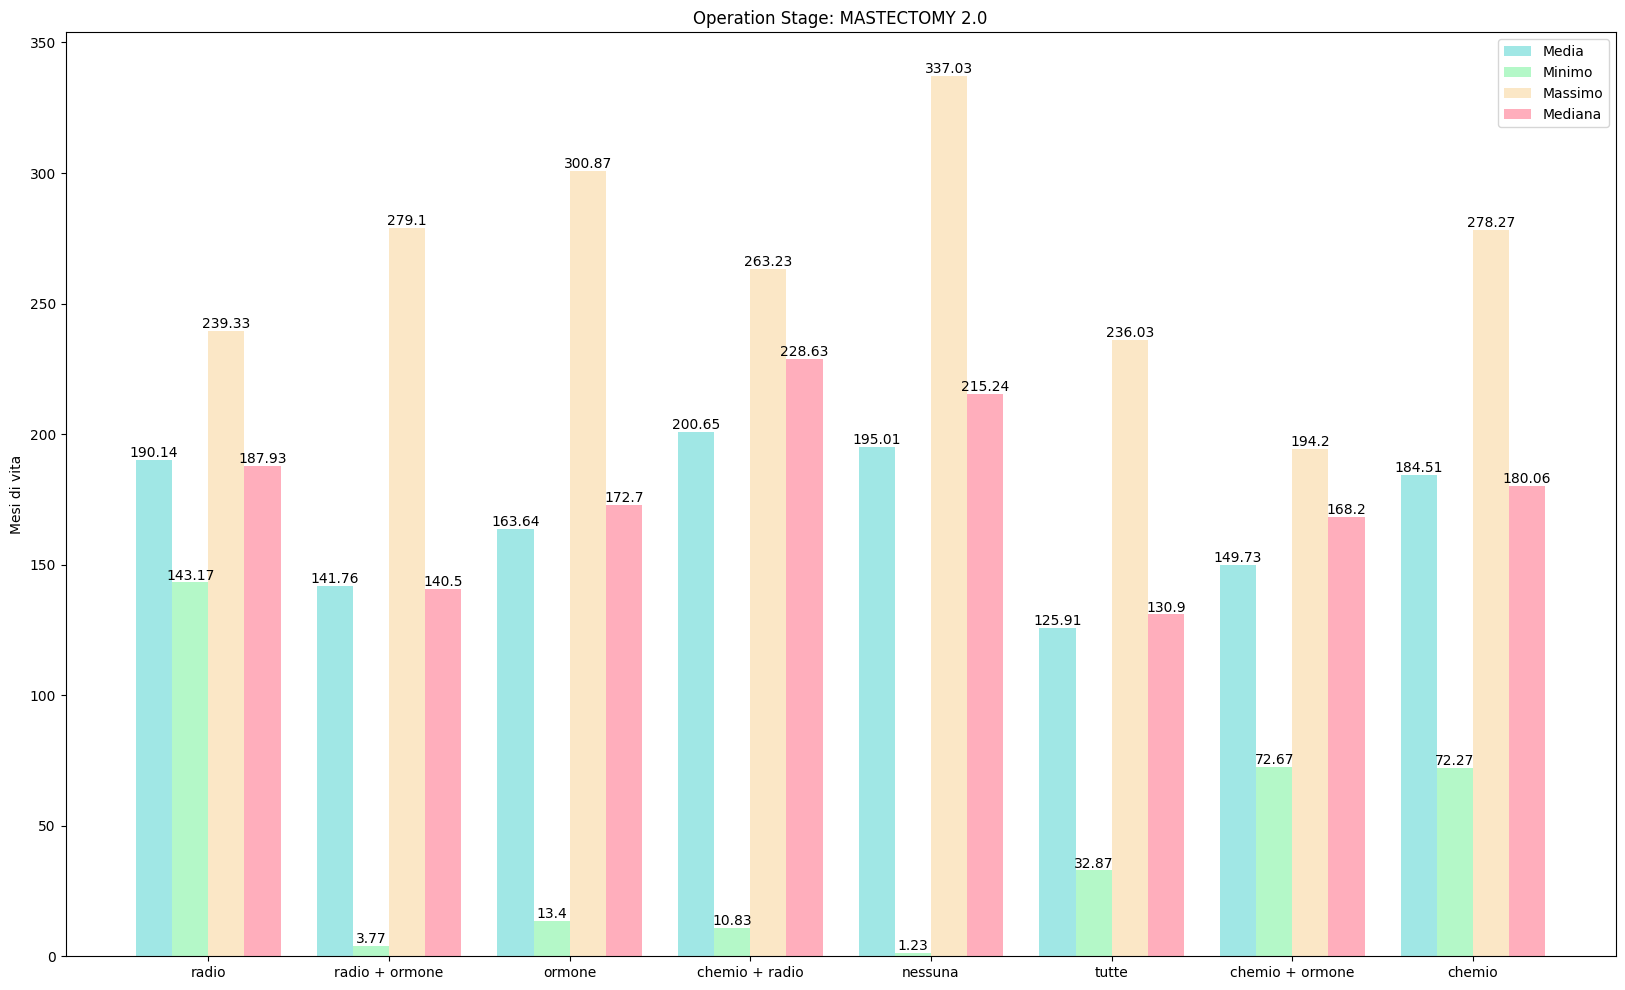

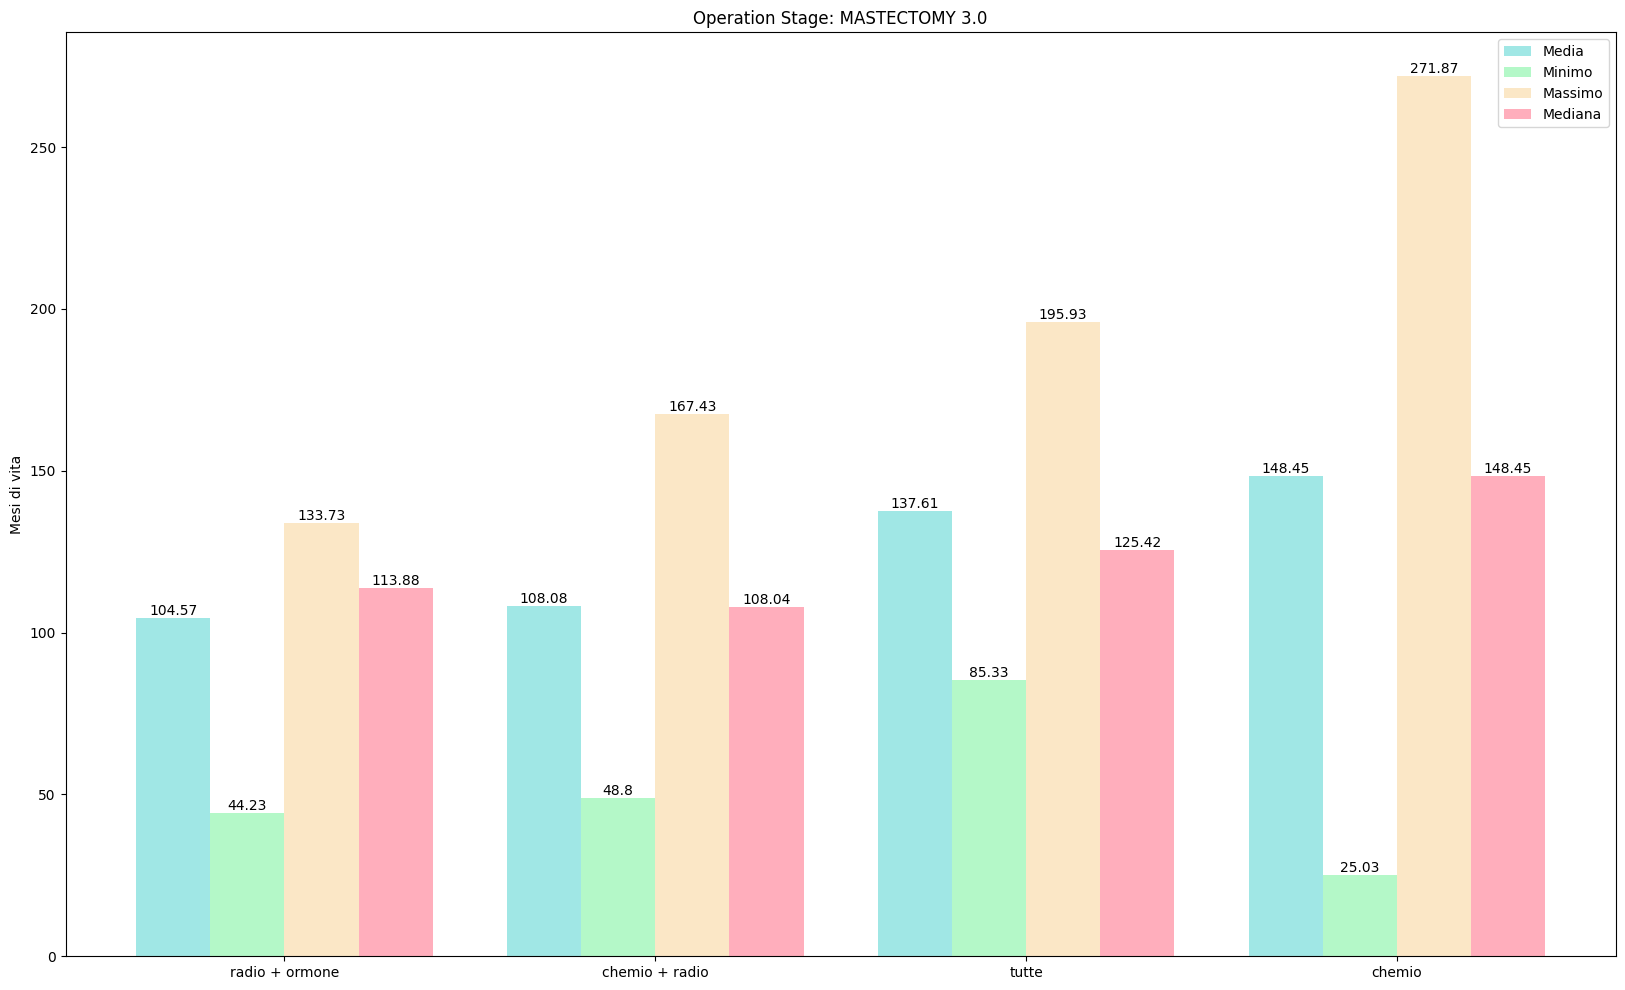

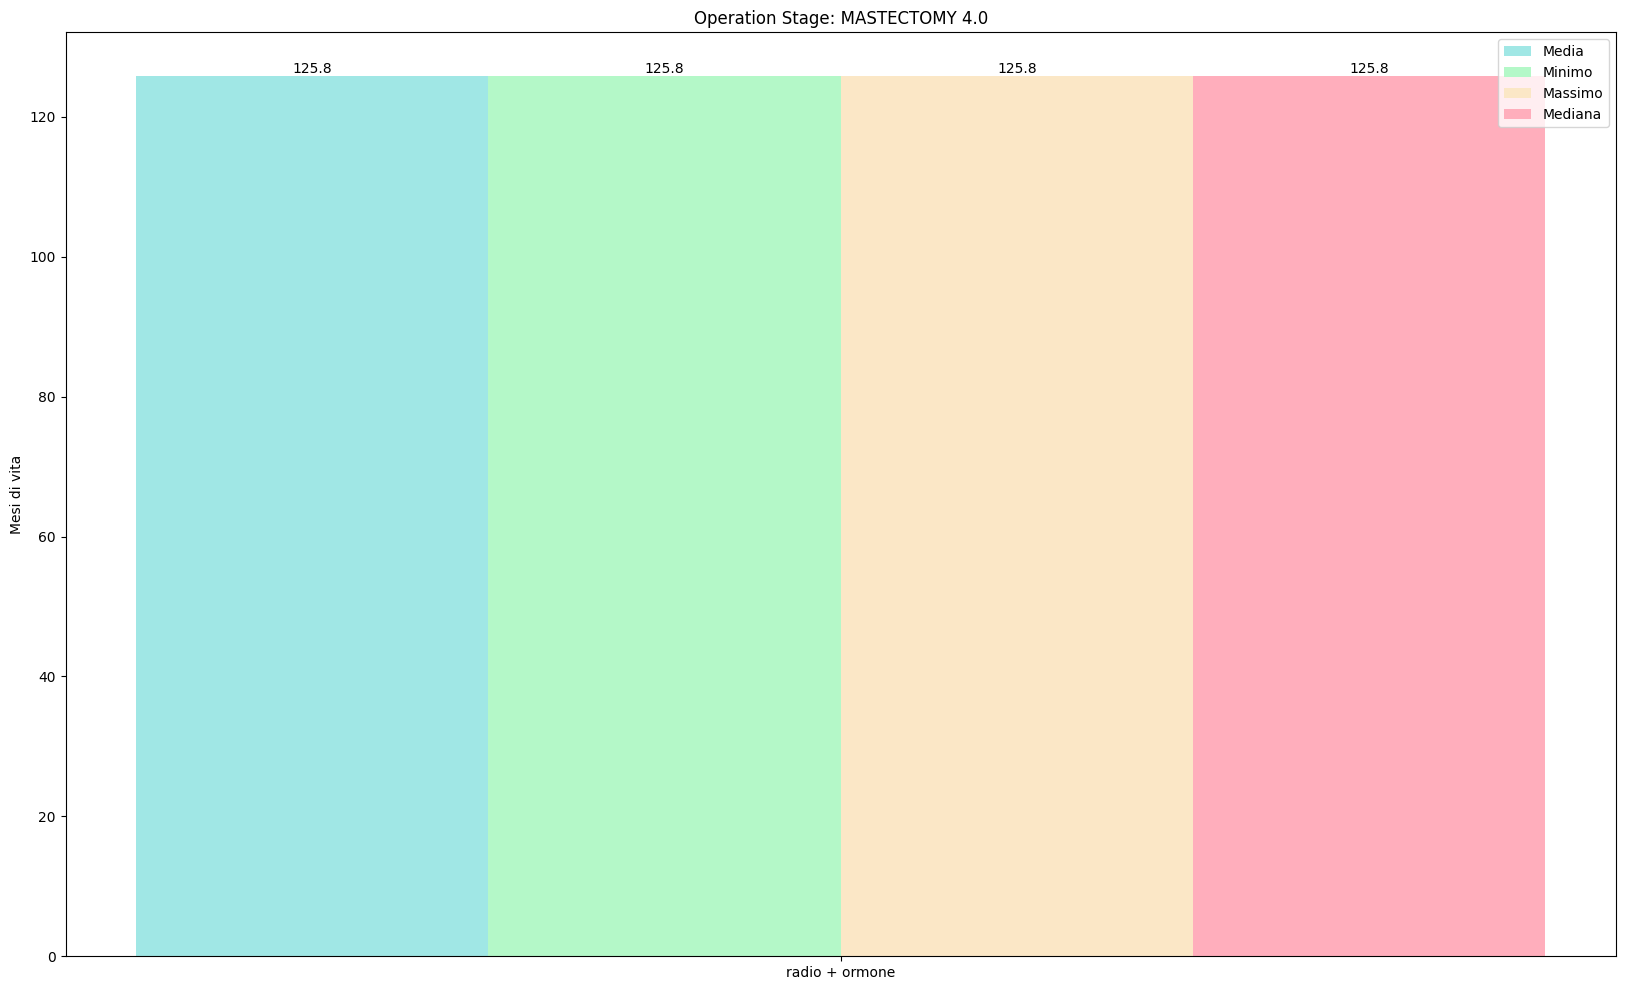

In [19]:
colori = ['#A0E7E5', '#B4F8C8', '#FBE7C6', '#FFAEBC']
nomi_barra = ['Media', 'Minimo', 'Massimo', 'Mediana']

for operazione in df_mesi_vita['Operation_Stage'].unique():
    df_finale = df_mesi_vita[(df_mesi_vita['Operation_Stage'] == operazione)]

    indice = np.arange(len(df_finale['Cura'].unique()))
    width = 0.2

    fig, ax = plt.subplots(figsize=(20, 12))

    for i, col in enumerate (nomi_barra):
        barre = ax.bar(indice + i*width, df_finale[col], width, label=nomi_barra[i], color=colori[i])

        for barra in barre:
                yval = barra.get_height()
                ax.text(
                    barra.get_x() + barra.get_width()/2,
                    yval,       
                    f'{yval}',           
                    ha='center',              
                    va='bottom'                     
                )
    
    ax.set_ylabel('Mesi di vita')
    ax.set_title(f'Operation Stage: {operazione}')
    ax.set_xticks(indice + width * 1.5)
    ax.set_xticklabels(df_finale['Cura'].unique())
    ax.legend()

    plt.show()